<a href="https://colab.research.google.com/github/aqibfirdous/DS-ML/blob/main/DiseasePrediction2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DISEASE PREDICTION#

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [41]:
print(os.listdir())

['.config', 'U.S._Chronic_Disease_Indicators__CDI_.csv', 'sample_data']


In [42]:
df =  pd.read_csv("/content/U.S._Chronic_Disease_Indicators__CDI_.csv",low_memory=False)

In [43]:
import pandas as pd

# Read the CSV file with low_memory=False to suppress the warning
df = pd.read_csv("/content/U.S._Chronic_Disease_Indicators__CDI_.csv", low_memory=False)
df


,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2010,2010,OR,Oregon,NVSS,Cardiovascular Disease,Mortality from heart failure,NaN,NaN,Number,...,41,CVD,CVD1_4,NMBR,RACE,AIAN,NaN,NaN,NaN,NaN
1,2019,2019,AZ,Arizona,YRBSS,Alcohol,Alcohol use among youth,NaN,%,Crude Prevalence,...,4,ALC,ALC1_1,CRDPREV,GENDER,GENF,NaN,NaN,NaN,NaN
2,2019,2019,OH,Ohio,YRBSS,Alcohol,Alcohol use among youth,NaN,%,Crude Prevalence,...,39,ALC,ALC1_1,CRDPREV,GENDER,GENM,NaN,NaN,NaN,NaN
3,2019,2019,US,United States,YRBSS,Alcohol,Alcohol use among youth,NaN,%,Crude Prevalence,...,59,ALC,ALC1_1,CRDPREV,RACE,ASN,NaN,NaN,NaN,NaN
4,2015,2015,VI,Virgin Islands,YRBSS,Alcohol,Alcohol use among youth,NaN,%,Crude Prevalence,...,78,ALC,ALC1_1,CRDPREV,GENDER,GENM,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195046,2010,2014,DC,District of Columbia,Statewide central cancer registries,Cancer,"Invasive melanoma, incidence",NaN,"per 100,000",Average Annual Age-adjusted Rate,...,11,CAN,CAN9_1,AVGANNAGEADJRATE,RACE,HIS,NaN,NaN,NaN,NaN
195047,2015,2019,CT,Connecticut,Statewide central cancer registries,Cancer,"Invasive melanoma, incidence",NaN,"per 100,000",Average Annual Age-adjusted Rate,...,9,CAN,CAN9_1,AVGANNAGEADJRATE,GENDER,GENF,NaN,NaN,NaN,NaN
195048,2015,2019,NV,Nevada,Statewide central cancer registries,Cancer,"Invasive melanoma, incidence",NaN,"per 100,000",Average Annual Crude Rate,...,32,CAN,CAN9_1,AVGANNCRDRATE,RACE,APIO,NaN,NaN,NaN,NaN
195049,2013,2017,AL,Alabama,Statewide central cancer registries,Cancer,"Invasive melanoma, incidence",NaN,"per 100,000",Average Annual Crude Rate,...,1,CAN,CAN9_1,AVGANNCRDRATE,GENDER,GENF,NaN,NaN,NaN,NaN


In [44]:
total_rows_in_dataset = df.shape[0]


In [45]:
total_rows_in_dataset

195051

<Axes: >

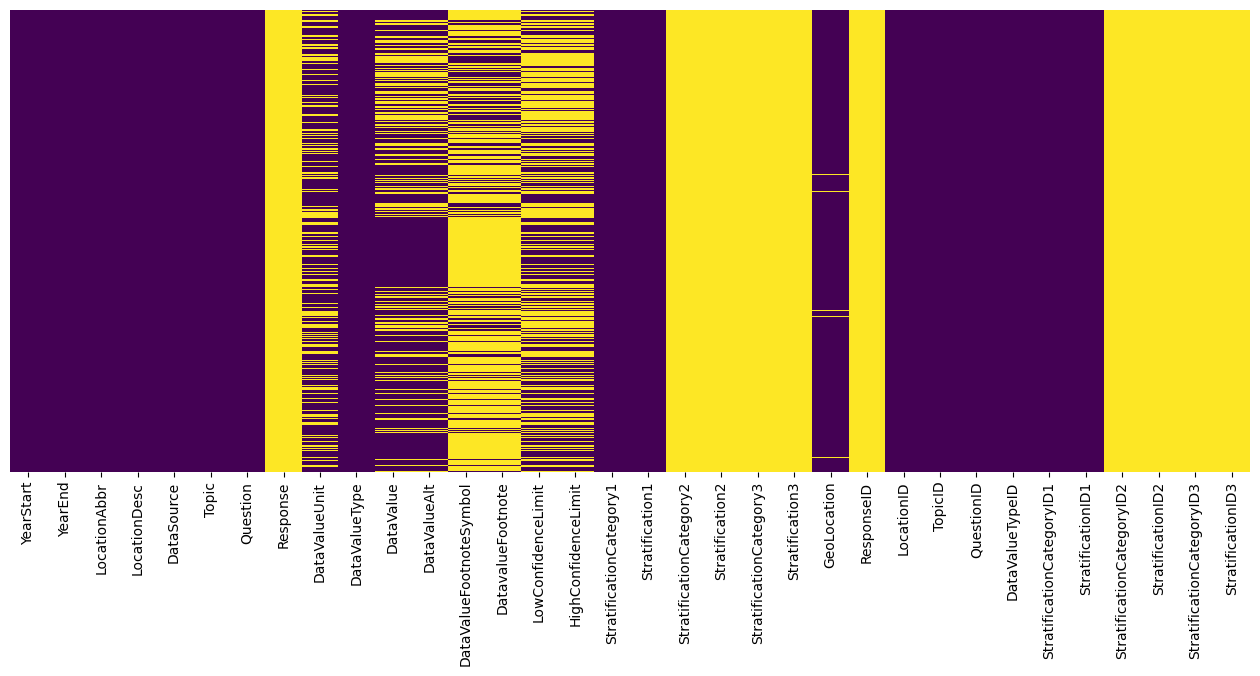

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(16, 6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')


In [47]:
columns_to_fill = ['StratificationCategoryID2', 'StratificationID2', 'StratificationCategoryID3',
                   'StratificationID3', 'Response','ResponseID','StratificationCategory2', 'Stratification2',
                   'StratificationCategory3', 'Stratification3','DataValueUnit', 'DataValue', 'DataValueFootnoteSymbol',
                   'DatavalueFootnote', 'GeoLocation','LowConfidenceLimit','HighConfidenceLimit','DataValueAlt']
fill_value = 9999

df.fillna({col: fill_value for col in columns_to_fill}, inplace=True)


<Axes: >

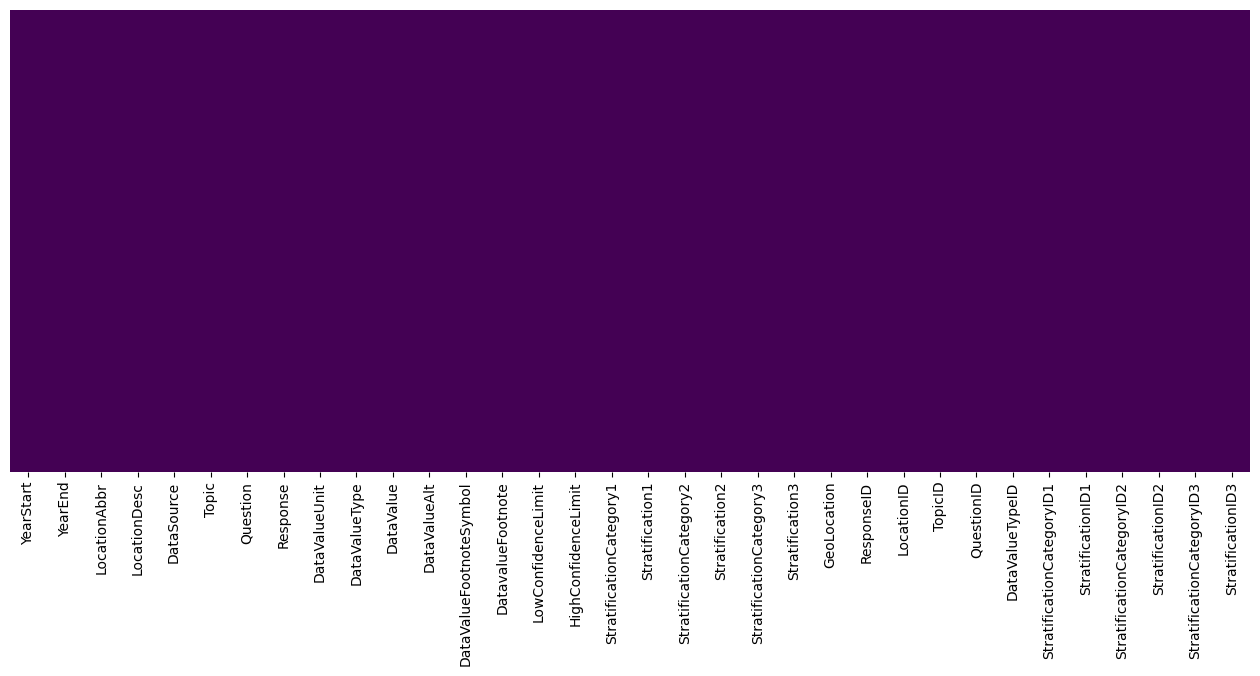

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(16, 6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')


In [49]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [50]:
# Iterate through the columns and apply the LabelEncoder
for column in df.columns:
    # Convert all values in the column to strings
    df[column] = df[column].astype(str)
    # Apply the LabelEncoder to the column
    df[column] = le.fit_transform(df[column])

# Now, all columns, whether they contain integers or strings, are label encoded
print(df)

        YearStart  YearEnd  LocationAbbr  LocationDesc  DataSource  Topic  \
0               3        1            38            38           9      4   
1              12       10             3             2          16      0   
2              12       10            36            36          16      0   
3              12       10            46            46          16      0   
4               8        6            49            49          16      0   
...           ...      ...           ...           ...         ...    ...   
195046          3        5             7             8          13      3   
195047          8       10             6             6          13      3   
195048          8       10            34            29          13      3   
195049          6        8             1             0          13      3   
195050          4        6            51            51           6      3   

        Question  Response  DataValueUnit  DataValueType  ...  LocationID  

In [51]:
# Define a mapping to change the feature names to the provided format
column_mapping = {
    'YearStart': 'ECG Result',
    'YearEnd': 'Stress Test Result',
    'LocationAbbr': 'Lipid Profile (Cholesterol) Result',
    'LocationDesc': 'Coronary Angiography Result',
    'DataSource': 'Pulmonary Function Test Result (Spirometry)',
    'Topic': 'Topic',
    'Question': 'Chest X-ray Result',
    'Response': 'Allergy Test Result',
    'DataValueUnit': 'Mammography Result',
    'DataValueType': 'Colonoscopy Result',
    'DataValue': 'Pap Smear Result',
    'DataValueAlt': 'Biopsy Result',
    'DataValueFootnoteSymbol': 'Fasting Blood Sugar Test Result',
    'DatavalueFootnote': 'Oral Glucose Tolerance Test (OGTT) Result',
    'LowConfidenceLimit': 'Hemoglobin A1c Result',
    'HighConfidenceLimit': 'Urine Glucose Test Result',
    'StratificationCategory1': 'Clinical Interviews Result',
    'Stratification1': 'Psychological Questionnaires Result',
    'StratificationCategory2': 'Mental Status Examination Result',
    'Stratification2': 'DSM-5 Criteria Status',
    'StratificationCategory3': 'Patient Interviews Result',
    'Stratification3': 'Nicotine/Cotinine Blood Test Result',
    'GeoLocation': 'Breath Carbon Monoxide (CO) Test Result',
    'ResponseID': 'Blood Pressure Measurement',
    'LocationID': 'Kidney Function Test (for Chronic Kidney Disease)',
    'TopicID': 'Pulmonary Function Test (Chronic Obstructive Pulmonary Disease)',
    'QuestionID': 'Depression Screening Result (Mental Health)',
    'DataValueTypeID': 'Tobacco Usage Status',
    'StratificationCategoryID1': 'Body Mass Index (BMI)',
    'StratificationID1': 'Vaccination Status (Immunization)',
    'StratificationCategoryID2': 'Nutrition Assessment Result',
    'StratificationID2': 'Physical Activity Assessment Result',
    'StratificationCategoryID3': 'Disability Assessment Result',
    'StratificationID3': 'Older Adults'
}

# Rename the features based on the mapping
df.rename(columns=column_mapping, inplace=True)
df

,ECG Result,Stress Test Result,Lipid Profile (Cholesterol) Result,Coronary Angiography Result,Pulmonary Function Test Result (Spirometry),Topic,Chest X-ray Result,Allergy Test Result,Mammography Result,Colonoscopy Result,...,Kidney Function Test (for Chronic Kidney Disease),Pulmonary Function Test (Chronic Obstructive Pulmonary Disease),Depression Screening Result (Mental Health),Tobacco Usage Status,Body Mass Index (BMI),Vaccination Status (Immunization),Nutrition Assessment Result,Physical Activity Assessment Result,Disability Assessment Result,Older Adults
0,3,1,38,38,9,4,96,0,2,13,...,33,6,72,14,2,0,0,0,0,0
1,12,10,3,2,16,0,3,0,1,8,...,31,0,1,9,0,6,0,0,0,0
2,12,10,36,36,16,0,3,0,1,8,...,30,0,1,9,0,7,0,0,0,0
3,12,10,46,46,16,0,3,0,1,8,...,48,0,1,9,2,4,0,0,0,0
4,8,6,49,49,16,0,3,0,1,8,...,52,0,1,9,0,7,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195046,3,5,7,8,13,3,84,0,10,4,...,2,3,53,4,2,8,0,0,0,0
195047,8,10,6,6,13,3,84,0,10,4,...,54,3,53,4,0,6,0,0,0,0
195048,8,10,34,29,13,3,84,0,10,5,...,23,3,53,5,2,3,0,0,0,0
195049,6,8,1,0,13,3,84,0,10,5,...,0,3,53,5,0,6,0,0,0,0


In [52]:
df.columns
df

,ECG Result,Stress Test Result,Lipid Profile (Cholesterol) Result,Coronary Angiography Result,Pulmonary Function Test Result (Spirometry),Topic,Chest X-ray Result,Allergy Test Result,Mammography Result,Colonoscopy Result,...,Kidney Function Test (for Chronic Kidney Disease),Pulmonary Function Test (Chronic Obstructive Pulmonary Disease),Depression Screening Result (Mental Health),Tobacco Usage Status,Body Mass Index (BMI),Vaccination Status (Immunization),Nutrition Assessment Result,Physical Activity Assessment Result,Disability Assessment Result,Older Adults
0,3,1,38,38,9,4,96,0,2,13,...,33,6,72,14,2,0,0,0,0,0
1,12,10,3,2,16,0,3,0,1,8,...,31,0,1,9,0,6,0,0,0,0
2,12,10,36,36,16,0,3,0,1,8,...,30,0,1,9,0,7,0,0,0,0
3,12,10,46,46,16,0,3,0,1,8,...,48,0,1,9,2,4,0,0,0,0
4,8,6,49,49,16,0,3,0,1,8,...,52,0,1,9,0,7,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195046,3,5,7,8,13,3,84,0,10,4,...,2,3,53,4,2,8,0,0,0,0
195047,8,10,6,6,13,3,84,0,10,4,...,54,3,53,4,0,6,0,0,0,0
195048,8,10,34,29,13,3,84,0,10,5,...,23,3,53,5,2,3,0,0,0,0
195049,6,8,1,0,13,3,84,0,10,5,...,0,3,53,5,0,6,0,0,0,0


<Axes: >

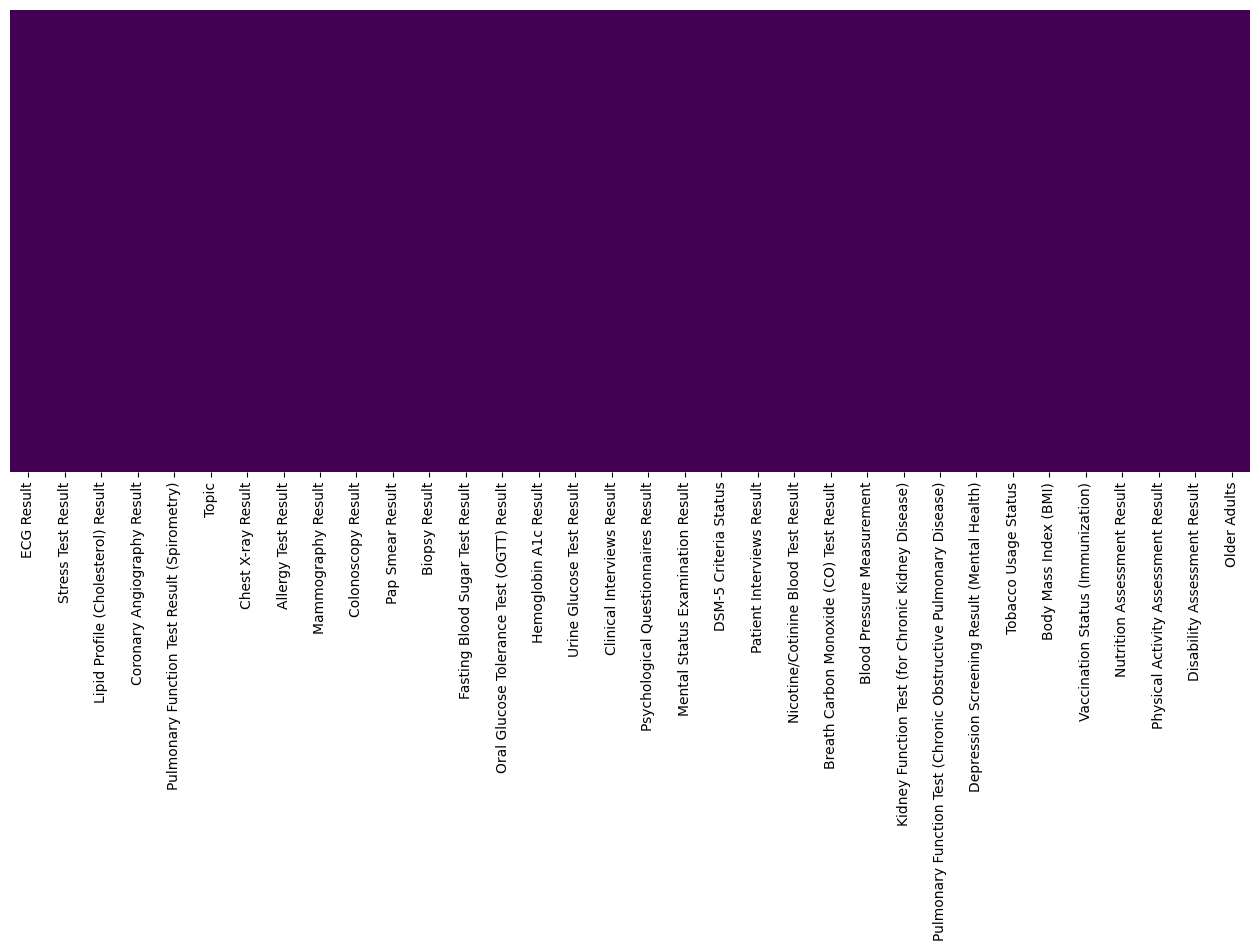

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(16, 6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Data pre-processing

In [54]:
#handling the problem
df.isnull().sum()

ECG Result                                                         0
Stress Test Result                                                 0
Lipid Profile (Cholesterol) Result                                 0
Coronary Angiography Result                                        0
Pulmonary Function Test Result (Spirometry)                        0
Topic                                                              0
Chest X-ray Result                                                 0
Allergy Test Result                                                0
Mammography Result                                                 0
Colonoscopy Result                                                 0
Pap Smear Result                                                   0
Biopsy Result                                                      0
Fasting Blood Sugar Test Result                                    0
Oral Glucose Tolerance Test (OGTT) Result                          0
Hemoglobin A1c Result             

###Methods for Data Cleaning


In [55]:
df.fillna(method='ffill')

,ECG Result,Stress Test Result,Lipid Profile (Cholesterol) Result,Coronary Angiography Result,Pulmonary Function Test Result (Spirometry),Topic,Chest X-ray Result,Allergy Test Result,Mammography Result,Colonoscopy Result,...,Kidney Function Test (for Chronic Kidney Disease),Pulmonary Function Test (Chronic Obstructive Pulmonary Disease),Depression Screening Result (Mental Health),Tobacco Usage Status,Body Mass Index (BMI),Vaccination Status (Immunization),Nutrition Assessment Result,Physical Activity Assessment Result,Disability Assessment Result,Older Adults
0,3,1,38,38,9,4,96,0,2,13,...,33,6,72,14,2,0,0,0,0,0
1,12,10,3,2,16,0,3,0,1,8,...,31,0,1,9,0,6,0,0,0,0
2,12,10,36,36,16,0,3,0,1,8,...,30,0,1,9,0,7,0,0,0,0
3,12,10,46,46,16,0,3,0,1,8,...,48,0,1,9,2,4,0,0,0,0
4,8,6,49,49,16,0,3,0,1,8,...,52,0,1,9,0,7,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195046,3,5,7,8,13,3,84,0,10,4,...,2,3,53,4,2,8,0,0,0,0
195047,8,10,6,6,13,3,84,0,10,4,...,54,3,53,4,0,6,0,0,0,0
195048,8,10,34,29,13,3,84,0,10,5,...,23,3,53,5,2,3,0,0,0,0
195049,6,8,1,0,13,3,84,0,10,5,...,0,3,53,5,0,6,0,0,0,0


In [56]:
df.interpolate()

,ECG Result,Stress Test Result,Lipid Profile (Cholesterol) Result,Coronary Angiography Result,Pulmonary Function Test Result (Spirometry),Topic,Chest X-ray Result,Allergy Test Result,Mammography Result,Colonoscopy Result,...,Kidney Function Test (for Chronic Kidney Disease),Pulmonary Function Test (Chronic Obstructive Pulmonary Disease),Depression Screening Result (Mental Health),Tobacco Usage Status,Body Mass Index (BMI),Vaccination Status (Immunization),Nutrition Assessment Result,Physical Activity Assessment Result,Disability Assessment Result,Older Adults
0,3,1,38,38,9,4,96,0,2,13,...,33,6,72,14,2,0,0,0,0,0
1,12,10,3,2,16,0,3,0,1,8,...,31,0,1,9,0,6,0,0,0,0
2,12,10,36,36,16,0,3,0,1,8,...,30,0,1,9,0,7,0,0,0,0
3,12,10,46,46,16,0,3,0,1,8,...,48,0,1,9,2,4,0,0,0,0
4,8,6,49,49,16,0,3,0,1,8,...,52,0,1,9,0,7,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195046,3,5,7,8,13,3,84,0,10,4,...,2,3,53,4,2,8,0,0,0,0
195047,8,10,6,6,13,3,84,0,10,4,...,54,3,53,4,0,6,0,0,0,0
195048,8,10,34,29,13,3,84,0,10,5,...,23,3,53,5,2,3,0,0,0,0
195049,6,8,1,0,13,3,84,0,10,5,...,0,3,53,5,0,6,0,0,0,0


In [57]:
df.select_dtypes(object)

""
0
1
2
3
4
...
195046
195047
195048
195049


###Method

In [58]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [59]:
# Iterate through the columns and apply the LabelEncoder
for column in df.columns:
    # Convert all values in the column to strings
    df[column] = df[column].astype(str)
    # Apply the LabelEncoder to the column
    df[column] = le.fit_transform(df[column])

# Now, all columns, whether they contain integers or strings, are label encoded
print(df)

        ECG Result  Stress Test Result  Lipid Profile (Cholesterol) Result  \
0                8                   1                                  32   
1                4                   2                                  23   
2                4                   2                                  30   
3                4                   2                                  41   
4               13                   9                                  44   
...            ...                 ...                                 ...   
195046           8                   8                                  52   
195047          13                   2                                  51   
195048          13                   2                                  28   
195049          11                  11                                   1   
195050           9                   9                                  47   

        Coronary Angiography Result  \
0                       

##Cleaned Dataset

<Axes: >

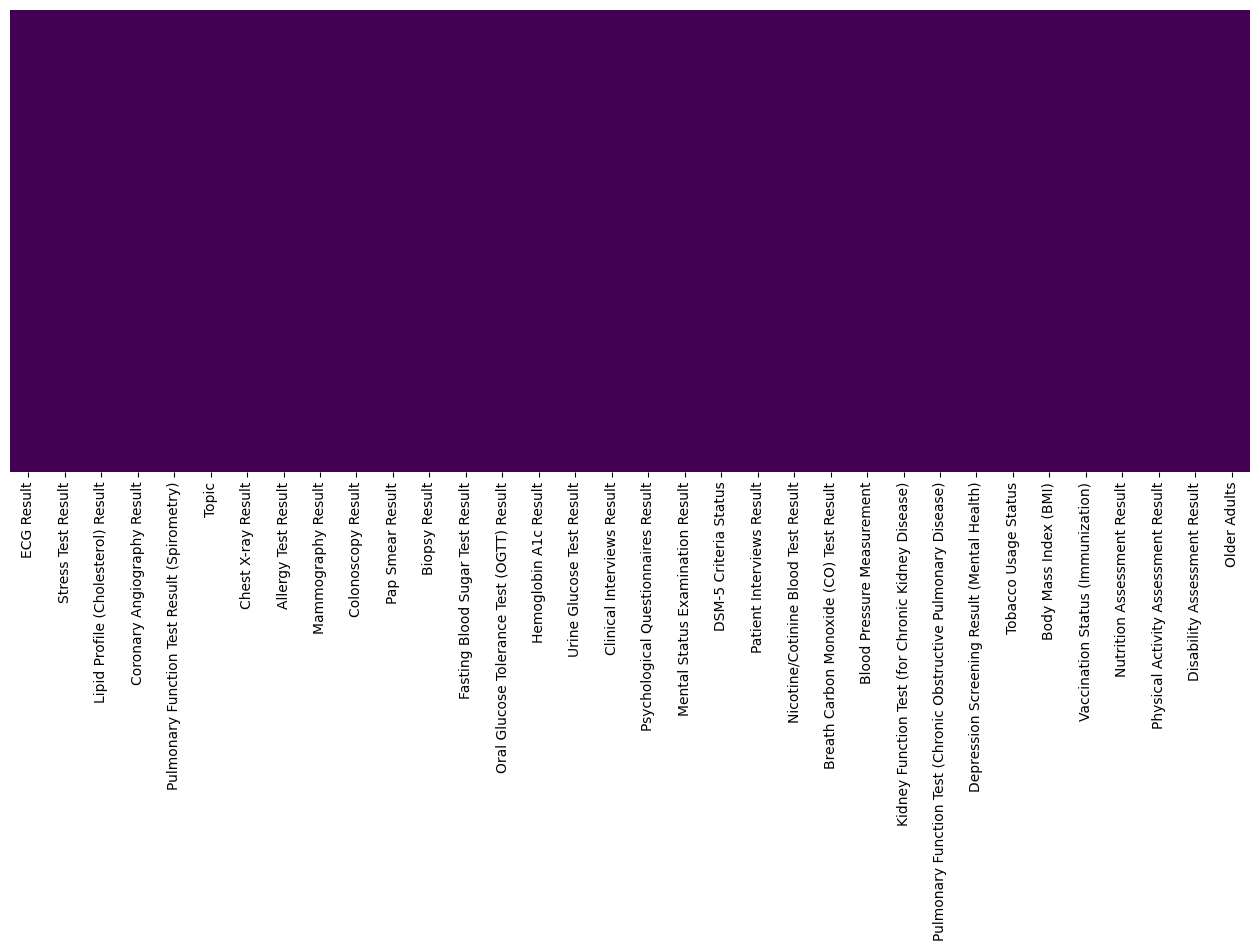

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(16, 6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

##Model Building

In [61]:
y=df['Topic']
y

0         11
1          0
2          0
3          0
4          0
          ..
195046    10
195047    10
195048    10
195049    10
195050    10
Name: Topic, Length: 195051, dtype: int64

In [62]:
x = df.drop('Topic',axis=1)
x

,ECG Result,Stress Test Result,Lipid Profile (Cholesterol) Result,Coronary Angiography Result,Pulmonary Function Test Result (Spirometry),Chest X-ray Result,Allergy Test Result,Mammography Result,Colonoscopy Result,Pap Smear Result,...,Kidney Function Test (for Chronic Kidney Disease),Pulmonary Function Test (Chronic Obstructive Pulmonary Disease),Depression Screening Result (Mental Health),Tobacco Usage Status,Body Mass Index (BMI),Vaccination Status (Immunization),Nutrition Assessment Result,Physical Activity Assessment Result,Disability Assessment Result,Older Adults
0,8,1,32,32,16,146,0,3,5,11986,...,27,13,120,6,2,0,0,0,0,0
1,4,2,23,12,8,73,0,1,15,11665,...,25,0,1,17,0,10,0,0,0,0
2,4,2,30,30,8,73,0,1,15,9787,...,24,0,1,17,0,11,0,0,0,0
3,4,2,41,41,8,73,0,1,15,6177,...,43,0,1,17,2,8,0,0,0,0
4,13,9,44,44,8,73,0,1,15,6023,...,48,0,1,17,0,11,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195046,8,8,52,53,5,133,0,2,11,6023,...,12,10,99,12,2,12,0,0,0,0
195047,13,2,51,51,5,133,0,2,11,7073,...,50,10,99,12,0,10,0,0,0,0
195048,13,2,28,22,5,133,0,2,12,5557,...,16,10,99,13,2,7,0,0,0,0
195049,11,11,1,0,5,133,0,2,12,8705,...,0,10,99,13,0,10,0,0,0,0


### Splitting the training and testing data

In [63]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)


In [67]:
x_train

,ECG Result,Stress Test Result,Lipid Profile (Cholesterol) Result,Coronary Angiography Result,Pulmonary Function Test Result (Spirometry),Chest X-ray Result,Allergy Test Result,Mammography Result,Colonoscopy Result,Pap Smear Result,...,Kidney Function Test (for Chronic Kidney Disease),Pulmonary Function Test (Chronic Obstructive Pulmonary Disease),Depression Screening Result (Mental Health),Tobacco Usage Status,Body Mass Index (BMI),Vaccination Status (Immunization),Nutrition Assessment Result,Physical Activity Assessment Result,Disability Assessment Result,Older Adults
119716,13,2,25,24,13,69,0,2,12,6023,...,17,10,91,13,2,9,0,0,0,0
104995,1,6,39,39,13,70,0,2,11,6023,...,32,10,93,12,2,1,0,0,0,0
82513,9,9,9,9,13,75,0,2,11,8356,...,3,10,82,12,1,3,0,0,0,0
1733,9,5,46,43,16,144,0,9,16,6023,...,37,13,119,2,2,12,0,0,0,0
96987,7,7,53,52,13,127,0,2,11,8209,...,1,10,89,12,2,4,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194442,13,2,39,39,5,133,0,2,11,9172,...,32,10,99,12,1,3,0,0,0,0
65615,11,11,28,22,13,74,0,2,12,3002,...,16,10,80,13,2,9,0,0,0,0
77655,8,8,38,38,5,132,0,2,11,6023,...,31,10,81,12,2,12,0,0,0,0
56088,9,9,1,0,5,131,0,3,13,9658,...,0,10,79,15,0,10,0,0,0,0


In [66]:
x_test

,ECG Result,Stress Test Result,Lipid Profile (Cholesterol) Result,Coronary Angiography Result,Pulmonary Function Test Result (Spirometry),Chest X-ray Result,Allergy Test Result,Mammography Result,Colonoscopy Result,Pap Smear Result,...,Kidney Function Test (for Chronic Kidney Disease),Pulmonary Function Test (Chronic Obstructive Pulmonary Disease),Depression Screening Result (Mental Health),Tobacco Usage Status,Body Mass Index (BMI),Vaccination Status (Immunization),Nutrition Assessment Result,Physical Activity Assessment Result,Disability Assessment Result,Older Adults
36324,3,12,35,35,4,118,0,8,10,6023,...,47,9,72,10,0,11,0,0,0,0
185067,12,12,1,0,13,72,0,2,12,11972,...,0,10,98,13,2,12,0,0,0,0
167048,1,6,48,49,13,68,0,3,13,2711,...,41,10,96,15,2,7,0,0,0,0
62290,9,9,11,11,5,131,0,3,13,6953,...,5,10,79,15,2,9,0,0,0,0
162572,8,8,42,42,5,133,0,3,13,5312,...,35,10,99,15,1,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154000,13,2,28,22,13,70,0,2,11,6023,...,16,10,93,12,2,1,0,0,0,0
166523,7,7,12,23,5,71,0,2,11,2588,...,36,10,97,12,0,10,0,0,0,0
43613,3,12,5,8,4,118,0,3,5,13878,...,54,9,72,6,2,12,0,0,0,0
21090,13,9,36,36,16,77,0,9,16,6127,...,29,0,2,2,1,3,0,0,0,0


In [65]:
y_train

119716    10
104995    10
82513     10
1733      11
96987     10
          ..
194442    10
65615     10
77655     10
56088     10
38408      9
Name: Topic, Length: 156040, dtype: int64

In [68]:
y_test

36324      9
185067    10
167048    10
62290     10
162572    10
          ..
154000    10
166523    10
43613      9
21090      0
77996     10
Name: Topic, Length: 39011, dtype: int64

In [69]:
print(df['Topic'].unique())


[11  0  1  9 10 12 13  2  8  6  5  7 14 16  3 15  4]


##XGBOOST ALGORITHM

In [70]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df[['ECG Result', 'Stress Test Result',
       'Lipid Profile (Cholesterol) Result', 'Coronary Angiography Result',
       'Pulmonary Function Test Result (Spirometry)',
       'Chest X-ray Result', 'Allergy Test Result', 'Mammography Result',
       'Colonoscopy Result', 'Pap Smear Result', 'Biopsy Result',
       'Fasting Blood Sugar Test Result',
       'Oral Glucose Tolerance Test (OGTT) Result', 'Hemoglobin A1c Result',
       'Urine Glucose Test Result', 'Clinical Interviews Result',
       'Psychological Questionnaires Result',
       'Mental Status Examination Result', 'DSM-5 Criteria Status',
       'Patient Interviews Result', 'Nicotine/Cotinine Blood Test Result',
       'Breath Carbon Monoxide (CO) Test Result', 'Blood Pressure Measurement',
       'Kidney Function Test (for Chronic Kidney Disease)',
       'Pulmonary Function Test (Chronic Obstructive Pulmonary Disease)',
       'Depression Screening Result (Mental Health)', 'Tobacco Usage Status',
       'Body Mass Index (BMI)', 'Vaccination Status (Immunization)',
       'Nutrition Assessment Result', 'Physical Activity Assessment Result',
       'Disability Assessment Result', 'Older Adults']]
y = df['Topic']
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit the label encoder to your class labels (training and test combined)
all_labels = pd.concat([y_train, y_test], axis=0)
label_encoder.fit(all_labels)

# Transform both the training and test labels
y_train_encoded = label_encoder.transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Create and train the XGBoost classifier with the encoded class labels
model = xgb.XGBClassifier()
model.fit(x_train, y_train_encoded)

# Make predictions on the training set
y_xgb_train_pred = model.predict(x_train)

# Make predictions on the test set
y_xgb_test_pred = model.predict(x_test)

# Calculate accuracy for training and test sets
train_accuracy = accuracy_score(y_train_encoded, y_xgb_train_pred)
test_accuracy = accuracy_score(y_test_encoded, y_xgb_test_pred)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


# Split your data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Create and train the XGBoost classifier
model = xgb.XGBClassifier()
model.fit(x_train, y_train)

# Make predictions on the training set
y_xgb_train_pred = model.predict(x_train)

# Make predictions on the test set
y_xgb_test_pred = model.predict(x_test)

# Print the predictions
print("Predictions on the training set:", y_xgb_train_pred)
print("Predictions on the test set:", y_xgb_test_pred)

# Calculate accuracy for training and test sets
train_accuracy = accuracy_score(y_train, y_xgb_train_pred)
test_accuracy = accuracy_score(y_test, y_xgb_test_pred)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# Calculate confusion matrix for the test set
confusion = confusion_matrix(y_test, y_xgb_test_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion)

# Calculate other scores as previously shown
train_f1 = f1_score(y_train, y_xgb_train_pred, average='weighted')
train_recall = recall_score(y_train, y_xgb_train_pred, average='weighted')
train_precision = precision_score(y_train, y_xgb_train_pred, average='weighted')

test_f1 = f1_score(y_test, y_xgb_test_pred, average='weighted')
test_recall = recall_score(y_test, y_xgb_test_pred, average='weighted')
test_precision = precision_score(y_test, y_xgb_test_pred, average='weighted')

false_alarm_rate = confusion[1, 0] / (confusion[0, 0] + confusion[1, 0])

# Print the scores
print("Training F1 Score:", train_f1)
print("Training Recall Score:", train_recall)
print("Training Precision Score:", train_precision)

print("Test F1 Score:", test_f1)
print("Test Recall Score:", test_recall)
print("Test Precision Score:", test_precision)
print("False Alarm Rate:", false_alarm_rate)


Training Accuracy: 1.0
Test Accuracy: 0.9999743662044038
Predictions on the training set: [10 10 10 ... 10 10  9]
Predictions on the test set: [ 9 10 10 ...  9  0 10]
Training Accuracy: 1.0
Test Accuracy: 0.9999743662044038
Confusion Matrix:
[[ 4098     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0]
 [    0   197     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0]
 [    0     0     3     0     0     0     0     0     0     0     0     0
      0     0     0     0     0]
 [    0     0     0    17     0     0     0     0     0     0     0     0
      0     0     0     0     0]
 [    0     0     0     0    15     1     0     0     0     0     0     0
      0     0     0     0     0]
 [    0     0     0     0     0     3     0     0     0     0     0     0
      0     0     0     0     0]
 [    0     0     0     0     0     0    27     0     0     0     0     0
      0     0     0     0     0]
 [    0  

### Model

In [71]:
import joblib

# Save the trained model to a file
model_filename = 'xgboost_model.pkl'
joblib.dump(model, model_filename)

# Load the saved model from the file
loaded_model = joblib.load(model_filename)

# You can now use loaded_model for predictions
y_test_pred = loaded_model.predict(x_test)


In [72]:
x = df.drop('Topic',axis=1)
x

,ECG Result,Stress Test Result,Lipid Profile (Cholesterol) Result,Coronary Angiography Result,Pulmonary Function Test Result (Spirometry),Chest X-ray Result,Allergy Test Result,Mammography Result,Colonoscopy Result,Pap Smear Result,...,Kidney Function Test (for Chronic Kidney Disease),Pulmonary Function Test (Chronic Obstructive Pulmonary Disease),Depression Screening Result (Mental Health),Tobacco Usage Status,Body Mass Index (BMI),Vaccination Status (Immunization),Nutrition Assessment Result,Physical Activity Assessment Result,Disability Assessment Result,Older Adults
0,8,1,32,32,16,146,0,3,5,11986,...,27,13,120,6,2,0,0,0,0,0
1,4,2,23,12,8,73,0,1,15,11665,...,25,0,1,17,0,10,0,0,0,0
2,4,2,30,30,8,73,0,1,15,9787,...,24,0,1,17,0,11,0,0,0,0
3,4,2,41,41,8,73,0,1,15,6177,...,43,0,1,17,2,8,0,0,0,0
4,13,9,44,44,8,73,0,1,15,6023,...,48,0,1,17,0,11,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195046,8,8,52,53,5,133,0,2,11,6023,...,12,10,99,12,2,12,0,0,0,0
195047,13,2,51,51,5,133,0,2,11,7073,...,50,10,99,12,0,10,0,0,0,0
195048,13,2,28,22,5,133,0,2,12,5557,...,16,10,99,13,2,7,0,0,0,0
195049,11,11,1,0,5,133,0,2,12,8705,...,0,10,99,13,0,10,0,0,0,0


In [73]:
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)


Shape of x: (195051, 33)
Shape of y: (195051,)


In [74]:
from sklearn.model_selection import train_test_split
import numpy as np

# Randomly resample y to match the size of x
y_resampled = np.random.choice(y, size=len(x), replace=True)

# Split the resampled data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y_resampled, test_size=0.2, random_state=100)


In [75]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)
x_train

,ECG Result,Stress Test Result,Lipid Profile (Cholesterol) Result,Coronary Angiography Result,Pulmonary Function Test Result (Spirometry),Chest X-ray Result,Allergy Test Result,Mammography Result,Colonoscopy Result,Pap Smear Result,...,Kidney Function Test (for Chronic Kidney Disease),Pulmonary Function Test (Chronic Obstructive Pulmonary Disease),Depression Screening Result (Mental Health),Tobacco Usage Status,Body Mass Index (BMI),Vaccination Status (Immunization),Nutrition Assessment Result,Physical Activity Assessment Result,Disability Assessment Result,Older Adults
119716,13,2,25,24,13,69,0,2,12,6023,...,17,10,91,13,2,9,0,0,0,0
104995,1,6,39,39,13,70,0,2,11,6023,...,32,10,93,12,2,1,0,0,0,0
82513,9,9,9,9,13,75,0,2,11,8356,...,3,10,82,12,1,3,0,0,0,0
1733,9,5,46,43,16,144,0,9,16,6023,...,37,13,119,2,2,12,0,0,0,0
96987,7,7,53,52,13,127,0,2,11,8209,...,1,10,89,12,2,4,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194442,13,2,39,39,5,133,0,2,11,9172,...,32,10,99,12,1,3,0,0,0,0
65615,11,11,28,22,13,74,0,2,12,3002,...,16,10,80,13,2,9,0,0,0,0
77655,8,8,38,38,5,132,0,2,11,6023,...,31,10,81,12,2,12,0,0,0,0
56088,9,9,1,0,5,131,0,3,13,9658,...,0,10,79,15,0,10,0,0,0,0


In [76]:
x_train

,ECG Result,Stress Test Result,Lipid Profile (Cholesterol) Result,Coronary Angiography Result,Pulmonary Function Test Result (Spirometry),Chest X-ray Result,Allergy Test Result,Mammography Result,Colonoscopy Result,Pap Smear Result,...,Kidney Function Test (for Chronic Kidney Disease),Pulmonary Function Test (Chronic Obstructive Pulmonary Disease),Depression Screening Result (Mental Health),Tobacco Usage Status,Body Mass Index (BMI),Vaccination Status (Immunization),Nutrition Assessment Result,Physical Activity Assessment Result,Disability Assessment Result,Older Adults
119716,13,2,25,24,13,69,0,2,12,6023,...,17,10,91,13,2,9,0,0,0,0
104995,1,6,39,39,13,70,0,2,11,6023,...,32,10,93,12,2,1,0,0,0,0
82513,9,9,9,9,13,75,0,2,11,8356,...,3,10,82,12,1,3,0,0,0,0
1733,9,5,46,43,16,144,0,9,16,6023,...,37,13,119,2,2,12,0,0,0,0
96987,7,7,53,52,13,127,0,2,11,8209,...,1,10,89,12,2,4,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194442,13,2,39,39,5,133,0,2,11,9172,...,32,10,99,12,1,3,0,0,0,0
65615,11,11,28,22,13,74,0,2,12,3002,...,16,10,80,13,2,9,0,0,0,0
77655,8,8,38,38,5,132,0,2,11,6023,...,31,10,81,12,2,12,0,0,0,0
56088,9,9,1,0,5,131,0,3,13,9658,...,0,10,79,15,0,10,0,0,0,0


In [77]:
x_test

,ECG Result,Stress Test Result,Lipid Profile (Cholesterol) Result,Coronary Angiography Result,Pulmonary Function Test Result (Spirometry),Chest X-ray Result,Allergy Test Result,Mammography Result,Colonoscopy Result,Pap Smear Result,...,Kidney Function Test (for Chronic Kidney Disease),Pulmonary Function Test (Chronic Obstructive Pulmonary Disease),Depression Screening Result (Mental Health),Tobacco Usage Status,Body Mass Index (BMI),Vaccination Status (Immunization),Nutrition Assessment Result,Physical Activity Assessment Result,Disability Assessment Result,Older Adults
36324,3,12,35,35,4,118,0,8,10,6023,...,47,9,72,10,0,11,0,0,0,0
185067,12,12,1,0,13,72,0,2,12,11972,...,0,10,98,13,2,12,0,0,0,0
167048,1,6,48,49,13,68,0,3,13,2711,...,41,10,96,15,2,7,0,0,0,0
62290,9,9,11,11,5,131,0,3,13,6953,...,5,10,79,15,2,9,0,0,0,0
162572,8,8,42,42,5,133,0,3,13,5312,...,35,10,99,15,1,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154000,13,2,28,22,13,70,0,2,11,6023,...,16,10,93,12,2,1,0,0,0,0
166523,7,7,12,23,5,71,0,2,11,2588,...,36,10,97,12,0,10,0,0,0,0
43613,3,12,5,8,4,118,0,3,5,13878,...,54,9,72,6,2,12,0,0,0,0
21090,13,9,36,36,16,77,0,9,16,6127,...,29,0,2,2,1,3,0,0,0,0


In [78]:
y_train

119716    10
104995    10
82513     10
1733      11
96987     10
          ..
194442    10
65615     10
77655     10
56088     10
38408      9
Name: Topic, Length: 156040, dtype: int64

In [79]:
y_test

36324      9
185067    10
167048    10
62290     10
162572    10
          ..
154000    10
166523    10
43613      9
21090      0
77996     10
Name: Topic, Length: 39011, dtype: int64

##DECISION TREE

###Accuracy of Decision Tree

In [80]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the dataset into a training set and a testing set (you can also use cross-validation)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create a DecisionTreeClassifier instance
dtc = DecisionTreeClassifier()

# Train the model on the training data
dtc.fit(x_train, y_train)

# Make predictions on the test data
y_pred = dtc.predict(x_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Optionally, you can visualize the decision tree
# This requires the graphviz library to be installed
#from sklearn.tree import plot_tree
#import matplotlib.pyplot as plt
#plt.figure(figsize=(10, 6))
#plot_tree(dtc, filled=True, feature_names=feature_names, class_names=class_names)
#plt.show()


Accuracy: 1.0


In [81]:
feature_names = df.columns.tolist()
# Assuming the target column is named 'target', extract class names
class_names = df['Topic'].unique().tolist()

print("Feature Names:", feature_names)
print("Class Names:", class_names)


Feature Names: ['ECG Result', 'Stress Test Result', 'Lipid Profile (Cholesterol) Result', 'Coronary Angiography Result', 'Pulmonary Function Test Result (Spirometry)', 'Topic', 'Chest X-ray Result', 'Allergy Test Result', 'Mammography Result', 'Colonoscopy Result', 'Pap Smear Result', 'Biopsy Result', 'Fasting Blood Sugar Test Result', 'Oral Glucose Tolerance Test (OGTT) Result', 'Hemoglobin A1c Result', 'Urine Glucose Test Result', 'Clinical Interviews Result', 'Psychological Questionnaires Result', 'Mental Status Examination Result', 'DSM-5 Criteria Status', 'Patient Interviews Result', 'Nicotine/Cotinine Blood Test Result', 'Breath Carbon Monoxide (CO) Test Result', 'Blood Pressure Measurement', 'Kidney Function Test (for Chronic Kidney Disease)', 'Pulmonary Function Test (Chronic Obstructive Pulmonary Disease)', 'Depression Screening Result (Mental Health)', 'Tobacco Usage Status', 'Body Mass Index (BMI)', 'Vaccination Status (Immunization)', 'Nutrition Assessment Result', 'Physica

### Plot of Decision Tree

In [82]:
unique_classes = df['Topic'].unique()  # Replace 'Topic' with your actual target variable name
print(unique_classes)

[11  0  1  9 10 12 13  2  8  6  5  7 14 16  3 15  4]


In [83]:
(np.unique(y_train))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [84]:
dtc.n_classes_

17

In [85]:
class_names

[11, 0, 1, 9, 10, 12, 13, 2, 8, 6, 5, 7, 14, 16, 3, 15, 4]

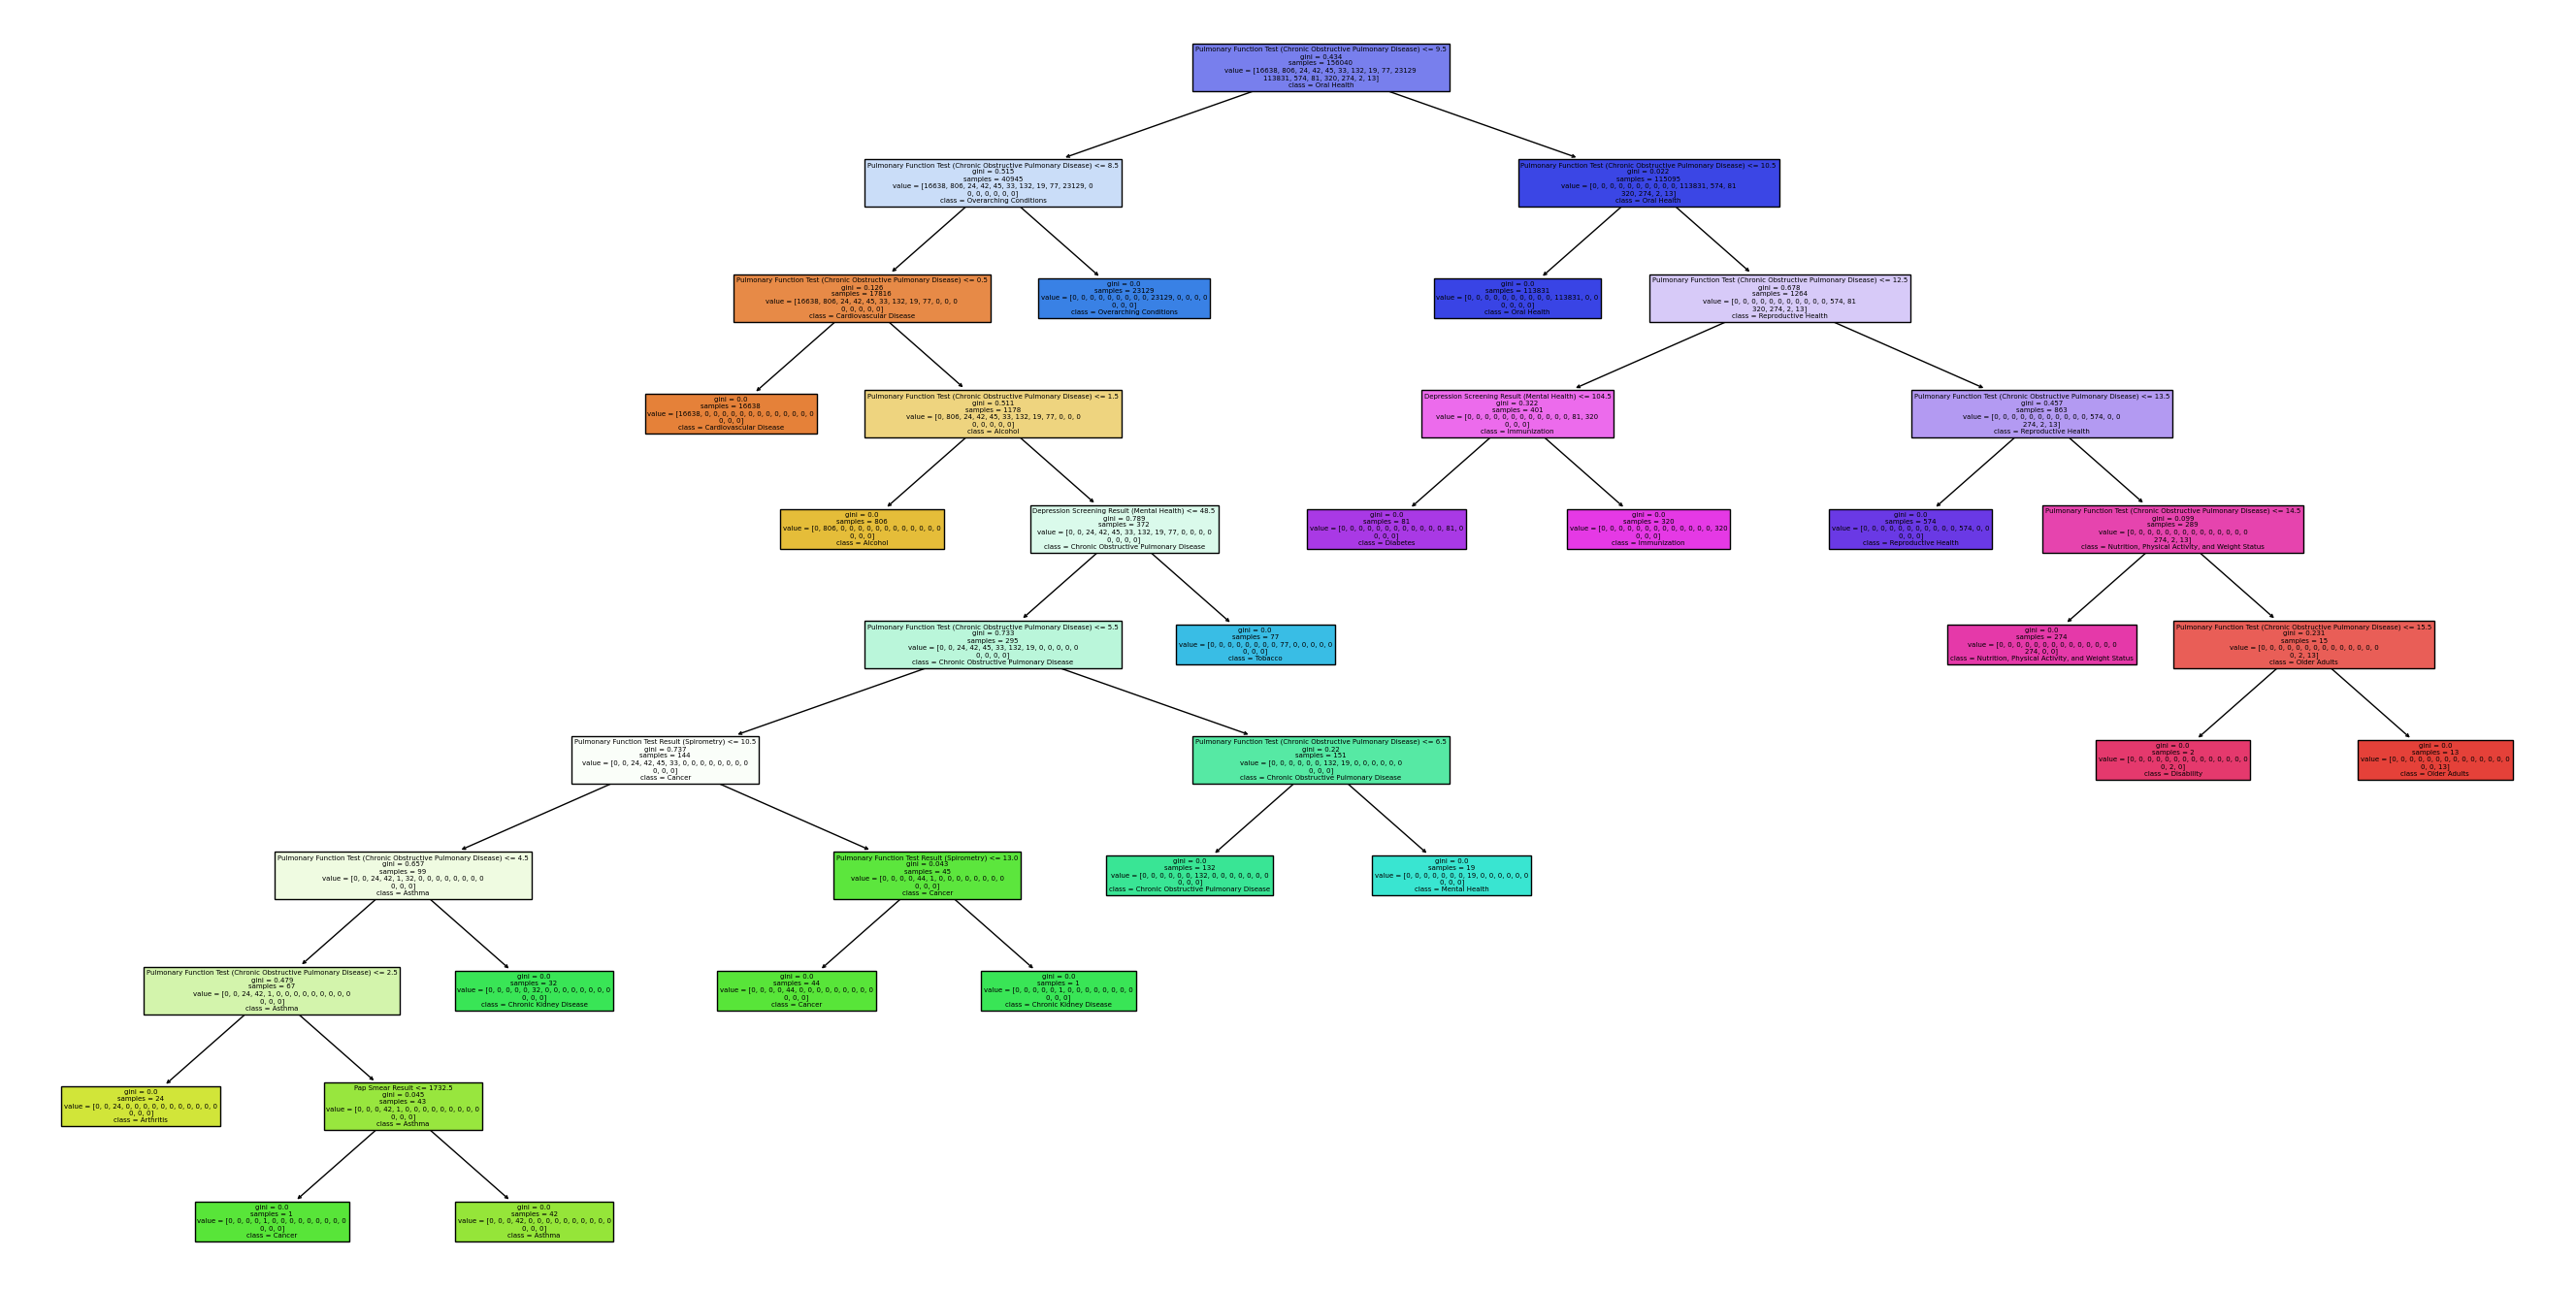

In [86]:
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

# Define class names with 17 classes
class_names = ['Cardiovascular Disease', 'Alcohol', 'Arthritis', 'Asthma', 'Cancer', 'Chronic Kidney Disease',
               'Chronic Obstructive Pulmonary Disease', 'Mental Health', 'Tobacco', 'Overarching Conditions',
               'Oral Health', 'Reproductive Health', 'Diabetes', 'Immunization', 'Nutrition, Physical Activity, and Weight Status',
               'Disability', 'Older Adults']

plt.figure(figsize=(34, 17))
plot_tree(dtc, filled=True, feature_names=['ECG Result', 'Stress Test Result',
       'Lipid Profile (Cholesterol) Result', 'Coronary Angiography Result',
       'Pulmonary Function Test Result (Spirometry)','Topic'
       'Chest X-ray Result', 'Allergy Test Result', 'Mammography Result',
       'Colonoscopy Result', 'Pap Smear Result', 'Biopsy Result',
       'Fasting Blood Sugar Test Result',
       'Oral Glucose Tolerance Test (OGTT) Result', 'Hemoglobin A1c Result',
       'Urine Glucose Test Result', 'Clinical Interviews Result',
       'Psychological Questionnaires Result',
       'Mental Status Examination Result', 'DSM-5 Criteria Status',
       'Patient Interviews Result', 'Nicotine/Cotinine Blood Test Result',
       'Breath Carbon Monoxide (CO) Test Result', 'Blood Pressure Measurement',
       'Kidney Function Test (for Chronic Kidney Disease)',
       'Pulmonary Function Test (Chronic Obstructive Pulmonary Disease)',
       'Depression Screening Result (Mental Health)', 'Tobacco Usage Status',
       'Body Mass Index (BMI)', 'Vaccination Status (Immunization)',
       'Nutrition Assessment Result', 'Physical Activity Assessment Result',
       'Disability Assessment Result', 'Older Adults'],
class_names=class_names)

plt.show()


In [87]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Split the dataset into a training set and a testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create a DecisionTreeClassifier instance
dtc = DecisionTreeClassifier()

# Train the model on the training data
dtc.fit(x_train, y_train)

# Make predictions on the test data
y_pred = dtc.predict(x_test)

# Calculate additional classification metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
confusion = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(confusion)


Accuracy: 0.9999743662044038
Precision: 0.9999551408577068
Recall: 0.9999743662044038
F1 Score: 0.9999633802920055
Confusion Matrix:
[[ 4106     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0]
 [    0   199     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0]
 [    0     0     4     0     0     0     0     0     0     0     0     0
      0     0     0     0     0]
 [    0     0     0     6     0     0     0     0     0     0     0     0
      0     0     0     0     0]
 [    0     0     0     0    12     0     0     0     0     0     0     0
      0     0     0     0     0]
 [    0     0     0     0     0     8     0     0     0     0     0     0
      0     0     0     0     0]
 [    0     0     0     0     0     0    35     0     0     0     0     0
      0     0     0     0     0]
 [    0     0     0     0     0     0     0     6     0     0     0     0
      0     0     0     0     0]
 [    0    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Model

In [88]:
import joblib

# Save the trained Decision Tree model to a file
model_filename = 'decision_tree_model.pkl'
joblib.dump(dtc, model_filename)

# Load the saved model from the file
loaded_model = joblib.load(model_filename)

# You can now use loaded_model for predictions
y_test_pred = loaded_model.predict(x_test)


In [89]:
import pandas as pd

# Assuming 'df' is your DataFrame and 'class_column' is the name of the column containing class labels
num_classes = df['Topic'].nunique()
print("Number of classes:", num_classes)


Number of classes: 17


In [90]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [91]:
# Iterate through the columns and apply the LabelEncoder
for column in df.columns:
    # Convert all values in the column to strings
    df[column] = df[column].astype(str)
    # Apply the LabelEncoder to the column
    df[column] = le.fit_transform(df[column])

# Now, all columns, whether they contain integers or strings, are label encoded
print(df)

        ECG Result  Stress Test Result  Lipid Profile (Cholesterol) Result  \
0               13                   1                                  26   
1                9                   5                                  16   
2                9                   5                                  24   
3                9                   5                                  36   
4                5                  12                                  39   
...            ...                 ...                                 ...   
195046          13                  11                                  48   
195047           5                   5                                  47   
195048           5                   5                                  21   
195049           3                   3                                   1   
195050          14                  12                                  42   

        Coronary Angiography Result  \
0                       

<Axes: >

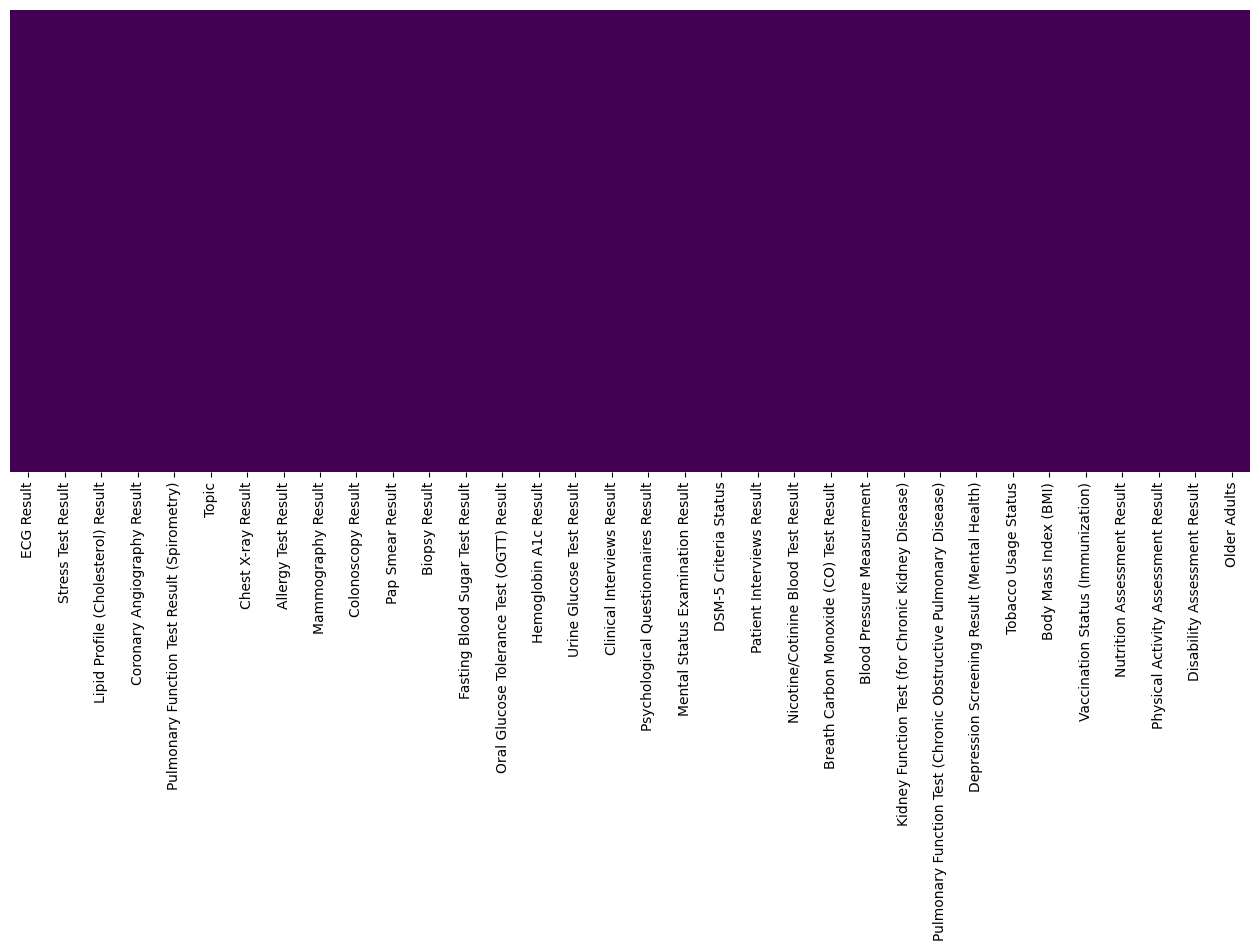

In [92]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(16, 6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [93]:
y=df['Topic']
y

0         3
1         0
2         0
3         0
4         0
         ..
195046    2
195047    2
195048    2
195049    2
195050    2
Name: Topic, Length: 195051, dtype: int64

In [94]:
x = df.drop('Topic',axis=1)
x

,ECG Result,Stress Test Result,Lipid Profile (Cholesterol) Result,Coronary Angiography Result,Pulmonary Function Test Result (Spirometry),Chest X-ray Result,Allergy Test Result,Mammography Result,Colonoscopy Result,Pap Smear Result,...,Kidney Function Test (for Chronic Kidney Disease),Pulmonary Function Test (Chronic Obstructive Pulmonary Disease),Depression Screening Result (Mental Health),Tobacco Usage Status,Body Mass Index (BMI),Vaccination Status (Immunization),Nutrition Assessment Result,Physical Activity Assessment Result,Disability Assessment Result,Older Adults
0,13,1,26,26,8,53,0,4,12,2209,...,20,5,25,14,2,0,0,0,0,0
1,9,5,16,4,15,121,0,1,7,1853,...,18,0,1,9,0,2,0,0,0,0
2,9,5,24,24,15,121,0,1,7,15192,...,17,0,1,9,0,3,0,0,0,0
3,9,5,36,36,15,121,0,1,7,11182,...,38,0,1,9,2,12,0,0,0,0
4,5,12,39,39,15,121,0,1,7,11012,...,43,0,1,9,0,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195046,13,11,48,49,12,39,0,3,3,11012,...,4,2,149,4,2,4,0,0,0,0
195047,5,5,47,47,12,39,0,3,3,12178,...,46,2,149,4,0,2,0,0,0,0
195048,5,5,21,15,12,39,0,3,4,10493,...,8,2,149,5,2,11,0,0,0,0
195049,3,3,1,0,12,39,0,3,4,13991,...,0,2,149,5,0,2,0,0,0,0


In [95]:
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)


Shape of x: (195051, 33)
Shape of y: (195051,)


In [96]:
from sklearn.model_selection import train_test_split
import numpy as np

# Randomly resample y to match the size of x
y_resampled = np.random.choice(y, size=len(x), replace=True)

# Split the resampled data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y_resampled, test_size=0.2, random_state=100)
x_train

,ECG Result,Stress Test Result,Lipid Profile (Cholesterol) Result,Coronary Angiography Result,Pulmonary Function Test Result (Spirometry),Chest X-ray Result,Allergy Test Result,Mammography Result,Colonoscopy Result,Pap Smear Result,...,Kidney Function Test (for Chronic Kidney Disease),Pulmonary Function Test (Chronic Obstructive Pulmonary Disease),Depression Screening Result (Mental Health),Tobacco Usage Status,Body Mass Index (BMI),Vaccination Status (Immunization),Nutrition Assessment Result,Physical Activity Assessment Result,Disability Assessment Result,Older Adults
119716,5,5,18,17,5,116,0,3,4,11012,...,9,2,141,5,2,13,0,0,0,0
104995,1,9,33,33,5,118,0,3,3,11012,...,26,2,143,4,2,1,0,0,0,0
82513,14,12,54,54,5,123,0,3,3,13603,...,23,2,131,4,1,7,0,0,0,0
1733,14,8,41,38,8,51,0,10,8,11012,...,31,5,23,10,2,4,0,0,0,0
96987,12,10,49,48,5,32,0,3,3,13440,...,1,2,138,4,2,8,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194442,5,5,33,33,12,39,0,3,3,14510,...,26,2,149,4,1,7,0,0,0,0
65615,3,3,21,15,5,122,0,3,4,7656,...,8,2,129,5,2,13,0,0,0,0
77655,13,11,32,32,12,38,0,3,3,11012,...,25,2,130,4,2,4,0,0,0,0
56088,14,12,1,0,12,37,0,4,5,15049,...,0,2,127,7,0,2,0,0,0,0


In [97]:
x_test

,ECG Result,Stress Test Result,Lipid Profile (Cholesterol) Result,Coronary Angiography Result,Pulmonary Function Test Result (Spirometry),Chest X-ray Result,Allergy Test Result,Mammography Result,Colonoscopy Result,Pap Smear Result,...,Kidney Function Test (for Chronic Kidney Disease),Pulmonary Function Test (Chronic Obstructive Pulmonary Disease),Depression Screening Result (Mental Health),Tobacco Usage Status,Body Mass Index (BMI),Vaccination Status (Immunization),Nutrition Assessment Result,Physical Activity Assessment Result,Disability Assessment Result,Older Adults
36324,8,4,29,29,11,22,0,9,2,11012,...,42,16,120,2,0,3,0,0,0,0
185067,4,4,1,0,5,120,0,3,4,2194,...,0,2,148,5,2,4,0,0,0,0
167048,1,9,43,44,5,115,0,4,5,7332,...,36,2,146,7,2,11,0,0,0,0
62290,14,12,3,3,12,37,0,4,5,12044,...,45,2,127,7,2,13,0,0,0,0
162572,13,11,37,37,12,39,0,4,5,10222,...,29,2,149,7,1,7,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154000,5,5,21,15,5,118,0,3,3,11012,...,8,2,143,4,2,1,0,0,0,0
166523,12,10,4,16,12,119,0,3,3,7194,...,30,2,147,4,0,2,0,0,0,0
43613,8,4,45,53,11,22,0,4,12,4311,...,50,16,120,14,2,4,0,0,0,0
21090,5,12,30,30,8,125,0,10,8,11127,...,22,0,62,10,1,7,0,0,0,0


In [98]:
y_train

array([2, 2, 2, ..., 2, 2, 2])

In [99]:
y_test

array([2, 2, 2, ..., 2, 2, 2])

##ANN ALGORITHM

In [100]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming you have your numeric feature data 'x' and labels 'y'
# Split your data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

# Standardize features using StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Define the number of classes
num_classes = 17  # Change this to the actual number of classes

# Create a function that builds the ANN model
def build_model(dropout_rate=0.5):
    model = keras.Sequential([
        layers.Input(shape=(x_train_scaled.shape[1],)),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(dropout_rate),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(dropout_rate),
        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(dropout_rate),
        layers.Dense(32, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(dropout_rate),
        layers.Dense(num_classes, activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'dropout_rate': [0.3],
    'batch_size': [128],
    'num_epochs': [100]
}

# Initialize K-Fold cross-validation
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize variables to store the best hyperparameters and accuracy
best_hyperparameters = None
best_accuracy = 0.0

# Perform hyperparameter tuning
for dropout_rate in param_grid['dropout_rate']:
    for batch_size in param_grid['batch_size']:
        for num_epochs in param_grid['num_epochs']:
            print(f"Training model with dropout={dropout_rate}, batch_size={batch_size}, num_epochs={num_epochs}")

            # Build the model
            model = build_model(dropout_rate=dropout_rate)

            # Train the model
            model.fit(x_train_scaled, y_train, epochs=num_epochs, batch_size=batch_size, verbose=1)

            # Evaluate accuracy on the validation set
            y_val_pred = model.predict(x_test_scaled)
            y_val_pred_classes = np.argmax(y_val_pred, axis=1)
            accuracy_val = accuracy_score(y_test, y_val_pred_classes)

            print(f"Validation accuracy: {accuracy_val:.4f}\n")

            # Check if this model has the best accuracy so far
            if accuracy_val > best_accuracy:
                best_accuracy = accuracy_val
                best_hyperparameters = {
                    'dropout_rate': dropout_rate,
                    'batch_size': batch_size,
                    'num_epochs': num_epochs
                }

print("Best Hyperparameters:", best_hyperparameters)
print("Best Validation Accuracy:", best_accuracy)
# Build and train the best model with the optimal hyperparameters
best_model = build_model(dropout_rate=best_hyperparameters['dropout_rate'])
best_model.fit(x_train_scaled, y_train, epochs=best_hyperparameters['num_epochs'], batch_size=best_hyperparameters['batch_size'], verbose=2)

# Save the best model using joblib
joblib.dump(best_model, "best_ann_model.pkl")

Training model with dropout=0.3, batch_size=128, num_epochs=100
Epoch 1/100
1220/1220 [==============================] - 17s 7ms/step - loss: 0.1989 - accuracy: 0.9590
Epoch 2/100
1220/1220 [==============================] - 13s 11ms/step - loss: 0.0287 - accuracy: 0.9920
Epoch 3/100
1220/1220 [==============================] - 14s 11ms/step - loss: 0.0202 - accuracy: 0.9936
Epoch 4/100
1220/1220 [==============================] - 8s 7ms/step - loss: 0.0162 - accuracy: 0.9947
Epoch 5/100
1220/1220 [==============================] - 8s 7ms/step - loss: 0.0134 - accuracy: 0.9954
Epoch 6/100
1220/1220 [==============================] - 9s 7ms/step - loss: 0.0119 - accuracy: 0.9960
Epoch 7/100
1220/1220 [==============================] - 8s 7ms/step - loss: 0.0111 - accuracy: 0.9963
Epoch 8/100
1220/1220 [==============================] - 8s 7ms/step - loss: 0.0093 - accuracy: 0.9969
Epoch 9/100
1220/1220 [==============================] - 9s 7ms/step - loss: 0.0089 - accuracy: 0.9970
Epoc

['best_ann_model.pkl']

In [108]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Predict using the best model
y_pred = best_model.predict(x_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate additional classification metrics
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')
confusion = confusion_matrix(y_test, y_pred_classes)

# Print the evaluation metrics
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(confusion)


1220/1220 [==============================] - 3s 2ms/step
Precision: 0.9999
Recall: 0.9999
F1 Score: 0.9999
Confusion Matrix:
[[ 4098     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0]
 [    0   197     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0]
 [    0     0 28495     0     0     0     0     0     0     0     0     0
      0     0     0     0     0]
 [    0     0     0   140     0     0     0     0     0     0     0     0
      0     0     0     0     0]
 [    0     0     0     0    20     0     0     0     0     0     0     0
      0     0     0     0     0]
 [    0     0     0     0     0    91     0     0     0     0     0     0
      0     0     0     0     0]
 [    0     0     0     0     0     0    79     0     0     0     0     0
      0     0     0     0     0]
 [    0     0     0     0     0     0     0     1     0     0     0     0
      0     0     0     0     0]
 [    0     0     0

##KNN AKGORITHM

In [109]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [110]:
# Iterate through the columns and apply the LabelEncoder
for column in df.columns:
    # Convert all values in the column to strings
    df[column] = df[column].astype(str)
    # Apply the LabelEncoder to the column
    df[column] = le.fit_transform(df[column])

# Now, all columns, whether they contain integers or strings, are label encoded
print(df)

        ECG Result  Stress Test Result  Lipid Profile (Cholesterol) Result  \
0                5                   1                                  19   
1               14                   8                                   8   
2               14                   8                                  17   
3               14                   8                                  30   
4               10                   4                                  33   
...            ...                 ...                                 ...   
195046           5                   3                                  43   
195047          10                   8                                  42   
195048          10                   8                                  14   
195049           8                   6                                   1   
195050           6                   4                                  37   

        Coronary Angiography Result  \
0                       

In [111]:
y=df['Topic']
y

0         10
1          0
2          0
3          0
4          0
          ..
195046     9
195047     9
195048     9
195049     9
195050     9
Name: Topic, Length: 195051, dtype: int64

In [112]:
x = df.drop('Topic',axis=1)
x

,ECG Result,Stress Test Result,Lipid Profile (Cholesterol) Result,Coronary Angiography Result,Pulmonary Function Test Result (Spirometry),Chest X-ray Result,Allergy Test Result,Mammography Result,Colonoscopy Result,Pap Smear Result,...,Kidney Function Test (for Chronic Kidney Disease),Pulmonary Function Test (Chronic Obstructive Pulmonary Disease),Depression Screening Result (Mental Health),Tobacco Usage Status,Body Mass Index (BMI),Vaccination Status (Immunization),Nutrition Assessment Result,Physical Activity Assessment Result,Disability Assessment Result,Older Adults
0,5,1,19,19,15,99,0,5,4,6774,...,13,12,68,6,2,0,0,0,0,0
1,14,8,8,34,7,26,0,1,14,6378,...,10,0,1,17,0,6,0,0,0,0
2,14,8,17,17,7,26,0,1,14,5772,...,9,0,1,17,0,7,0,0,0,0
3,14,8,30,30,7,26,0,1,14,1317,...,32,0,1,17,2,4,0,0,0,0
4,10,4,33,33,7,26,0,1,14,1129,...,38,0,1,17,0,7,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195046,5,3,43,44,4,83,0,4,10,1129,...,34,9,56,12,2,8,0,0,0,0
195047,10,8,42,42,4,83,0,4,10,2423,...,41,9,56,12,0,6,0,0,0,0
195048,10,8,14,7,4,83,0,4,11,551,...,53,9,56,13,2,3,0,0,0,0
195049,8,6,1,0,4,83,0,4,11,4437,...,0,9,56,13,0,6,0,0,0,0


In [113]:
from sklearn.model_selection import train_test_split
import numpy as np

# Randomly resample y to match the size of x
y_resampled = np.random.choice(y, size=len(x), replace=True)

# Split the resampled data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y_resampled, test_size=0.2, random_state=100)


In [114]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)
x_train

,ECG Result,Stress Test Result,Lipid Profile (Cholesterol) Result,Coronary Angiography Result,Pulmonary Function Test Result (Spirometry),Chest X-ray Result,Allergy Test Result,Mammography Result,Colonoscopy Result,Pap Smear Result,...,Kidney Function Test (for Chronic Kidney Disease),Pulmonary Function Test (Chronic Obstructive Pulmonary Disease),Depression Screening Result (Mental Health),Tobacco Usage Status,Body Mass Index (BMI),Vaccination Status (Immunization),Nutrition Assessment Result,Physical Activity Assessment Result,Disability Assessment Result,Older Adults
119716,10,8,10,9,12,20,0,4,11,1129,...,54,9,48,13,2,5,0,0,0,0
104995,1,12,27,27,12,22,0,4,10,1129,...,19,9,50,12,2,1,0,0,0,0
82513,6,4,50,50,12,28,0,4,10,4007,...,16,9,37,12,1,11,0,0,0,0
1733,6,11,36,32,15,97,0,2,15,1129,...,25,12,66,2,2,8,0,0,0,0
96987,4,2,44,43,12,76,0,4,10,3826,...,1,9,44,12,2,12,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194442,10,8,27,27,4,83,0,4,10,5015,...,19,9,56,12,1,11,0,0,0,0
65615,8,6,14,7,12,27,0,4,11,12825,...,53,9,34,13,2,5,0,0,0,0
77655,5,3,26,26,4,82,0,4,10,1129,...,18,9,36,12,2,8,0,0,0,0
56088,6,4,1,0,4,81,0,5,12,5613,...,0,9,32,15,0,6,0,0,0,0


In [115]:
x_train

,ECG Result,Stress Test Result,Lipid Profile (Cholesterol) Result,Coronary Angiography Result,Pulmonary Function Test Result (Spirometry),Chest X-ray Result,Allergy Test Result,Mammography Result,Colonoscopy Result,Pap Smear Result,...,Kidney Function Test (for Chronic Kidney Disease),Pulmonary Function Test (Chronic Obstructive Pulmonary Disease),Depression Screening Result (Mental Health),Tobacco Usage Status,Body Mass Index (BMI),Vaccination Status (Immunization),Nutrition Assessment Result,Physical Activity Assessment Result,Disability Assessment Result,Older Adults
119716,10,8,10,9,12,20,0,4,11,1129,...,54,9,48,13,2,5,0,0,0,0
104995,1,12,27,27,12,22,0,4,10,1129,...,19,9,50,12,2,1,0,0,0,0
82513,6,4,50,50,12,28,0,4,10,4007,...,16,9,37,12,1,11,0,0,0,0
1733,6,11,36,32,15,97,0,2,15,1129,...,25,12,66,2,2,8,0,0,0,0
96987,4,2,44,43,12,76,0,4,10,3826,...,1,9,44,12,2,12,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194442,10,8,27,27,4,83,0,4,10,5015,...,19,9,56,12,1,11,0,0,0,0
65615,8,6,14,7,12,27,0,4,11,12825,...,53,9,34,13,2,5,0,0,0,0
77655,5,3,26,26,4,82,0,4,10,1129,...,18,9,36,12,2,8,0,0,0,0
56088,6,4,1,0,4,81,0,5,12,5613,...,0,9,32,15,0,6,0,0,0,0


In [116]:
x_test

,ECG Result,Stress Test Result,Lipid Profile (Cholesterol) Result,Coronary Angiography Result,Pulmonary Function Test Result (Spirometry),Chest X-ray Result,Allergy Test Result,Mammography Result,Colonoscopy Result,Pap Smear Result,...,Kidney Function Test (for Chronic Kidney Disease),Pulmonary Function Test (Chronic Obstructive Pulmonary Disease),Depression Screening Result (Mental Health),Tobacco Usage Status,Body Mass Index (BMI),Vaccination Status (Immunization),Nutrition Assessment Result,Physical Activity Assessment Result,Disability Assessment Result,Older Adults
36324,13,7,22,22,3,65,0,10,9,1129,...,37,8,25,10,0,7,0,0,0,0
185067,9,7,1,0,12,25,0,4,11,6757,...,0,9,55,13,2,8,0,0,0,0
167048,1,12,38,39,12,19,0,5,12,12466,...,30,9,53,15,2,3,0,0,0,0
62290,6,4,23,23,4,81,0,5,12,2275,...,40,9,32,15,2,5,0,0,0,0
162572,5,3,31,31,4,83,0,5,12,251,...,22,9,56,15,1,11,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154000,10,8,14,7,12,22,0,4,10,1129,...,53,9,50,12,2,1,0,0,0,0
166523,4,2,34,8,4,23,0,4,10,12312,...,24,9,54,12,0,6,0,0,0,0
43613,13,7,40,49,3,65,0,5,4,9110,...,46,8,25,6,2,8,0,0,0,0
21090,10,4,24,24,15,30,0,2,15,1256,...,15,0,109,2,1,11,0,0,0,0


In [117]:
y_train

119716     9
104995     9
82513      9
1733      10
96987      9
          ..
194442     9
65615      9
77655      9
56088      9
38408      8
Name: Topic, Length: 156040, dtype: int64

In [118]:
y_test

36324     8
185067    9
167048    9
62290     9
162572    9
         ..
154000    9
166523    9
43613     8
21090     0
77996     9
Name: Topic, Length: 39011, dtype: int64

In [119]:
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split your data into training, validation, and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Standardize features using StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

# Hyperparameter tuning
k_neighbors = 5  # You can adjust this hyperparameter
knn_model = KNeighborsClassifier(n_neighbors=k_neighbors)

# Cross-validation
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

train_accs = []
val_accs = []

for train_index, val_index in kf.split(x_train_scaled):
    x_train_fold, x_val_fold = x_train_scaled[train_index], x_train_scaled[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Fit the KNN model to the training fold
    knn_model.fit(x_train_fold, y_train_fold)

    # Evaluate accuracy on the training fold
    train_pred = knn_model.predict(x_train_fold)
    train_acc = accuracy_score(y_train_fold, train_pred)
    train_accs.append(train_acc)

    # Evaluate accuracy on the validation fold
    val_pred = knn_model.predict(x_val_fold)
    val_acc = accuracy_score(y_val_fold, val_pred)
    val_accs.append(val_acc)

mean_train_acc = np.mean(train_accs)
std_train_acc = np.std(train_accs)
mean_val_acc = np.mean(val_accs)
std_val_acc = np.std(val_accs)

print(f"Mean Training Accuracy: {mean_train_acc:.4f} ± {std_train_acc:.4f}")
print(f"Mean Validation Accuracy: {mean_val_acc:.4f} ± {std_val_acc:.4f}")

# Fit the final KNN model on the entire training data
knn_model.fit(x_train_scaled, y_train)

# Make predictions on the validation and test sets
val_pred = knn_model.predict(x_val_scaled)
test_pred = knn_model.predict(x_test_scaled)

# Calculate accuracy on the validation and test sets
val_accuracy = accuracy_score(y_val, val_pred)
test_accuracy = accuracy_score(y_test, test_pred)

from sklearn.metrics import classification_report
# Calculate the classification report with zero division handling
class_report = classification_report(y_test, test_pred, zero_division=0)

# Print classification report for more detailed evaluation
print("Validation Set Accuracy:", val_accuracy)
print("Test Set Accuracy:", test_accuracy)
print("Classification Report for Test Set:")
print(classification_report(y_test, test_pred, zero_division=0))

Mean Training Accuracy: 0.9956 ± 0.0002
Mean Validation Accuracy: 0.9940 ± 0.0006
Validation Set Accuracy: 0.9942963342732632
Test Set Accuracy: 0.9940016918305093
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4098
           1       0.96      0.98      0.97       197
           2       1.00      0.06      0.11        17
           3       0.50      0.12      0.20        16
           4       0.25      0.33      0.29         3
           5       0.65      0.63      0.64        27
           6       0.50      0.60      0.55         5
           7       0.67      0.35      0.46        17
           8       0.99      1.00      0.99      5799
           9       1.00      1.00      1.00     28495
          10       0.67      0.72      0.70       140
          11       0.56      0.25      0.34        20
          12       0.74      0.19      0.30        91
          13       0.78      0.54      0.64

In [120]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, test_pred, average='weighted')
recall = recall_score(y_test, test_pred, average='weighted')
f1 = f1_score(y_test, test_pred, average='weighted')

# Print precision, recall, and F1 score
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Calculate and print the classification report
class_report = classification_report(y_test, test_pred)
print("Classification Report for Test Set:")
print(class_report)


Precision: 0.9931
Recall: 0.9940
F1 Score: 0.9928
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4098
           1       0.96      0.98      0.97       197
           2       1.00      0.06      0.11        17
           3       0.50      0.12      0.20        16
           4       0.25      0.33      0.29         3
           5       0.65      0.63      0.64        27
           6       0.50      0.60      0.55         5
           7       0.67      0.35      0.46        17
           8       0.99      1.00      0.99      5799
           9       1.00      1.00      1.00     28495
          10       0.67      0.72      0.70       140
          11       0.56      0.25      0.34        20
          12       0.74      0.19      0.30        91
          13       0.78      0.54      0.64        79
          14       0.00      0.00      0.00         1
          15       1.00      0.67      0.80      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

In [121]:

import joblib
# Specify the filename for the saved model
model_filename = 'knn_model.pkl'
# Save the KNN model using Joblib
joblib.dump(knn_model, model_filename)
print(f"KNN model has been saved as '{model_filename}'.")

KNN model has been saved as 'knn_model.pkl'.


##SVM ALGORITHM

In [122]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [123]:
# Iterate through the columns and apply the LabelEncoder
for column in df.columns:
    # Convert all values in the column to strings
    df[column] = df[column].astype(str)
    # Apply the LabelEncoder to the column
    df[column] = le.fit_transform(df[column])

# Now, all columns, whether they contain integers or strings, are label encoded
print(df)

        ECG Result  Stress Test Result  Lipid Profile (Cholesterol) Result  \
0               10                   1                                  11   
1                6                  11                                  53   
2                6                  11                                   9   
3                6                  11                                  24   
4                2                   7                                  27   
...            ...                 ...                                 ...   
195046          10                   6                                  38   
195047           2                  11                                  37   
195048           2                  11                                   6   
195049          13                   9                                   1   
195050          11                   7                                  31   

        Coronary Angiography Result  \
0                       

In [124]:
y=df['Topic']
y

0          2
1          0
2          0
3          0
4          0
          ..
195046    16
195047    16
195048    16
195049    16
195050    16
Name: Topic, Length: 195051, dtype: int64

In [125]:
x = df.drop('Topic',axis=1)
x

,ECG Result,Stress Test Result,Lipid Profile (Cholesterol) Result,Coronary Angiography Result,Pulmonary Function Test Result (Spirometry),Chest X-ray Result,Allergy Test Result,Mammography Result,Colonoscopy Result,Pap Smear Result,...,Kidney Function Test (for Chronic Kidney Disease),Pulmonary Function Test (Chronic Obstructive Pulmonary Disease),Depression Screening Result (Mental Health),Tobacco Usage Status,Body Mass Index (BMI),Vaccination Status (Immunization),Nutrition Assessment Result,Physical Activity Assessment Result,Disability Assessment Result,Older Adults
0,10,1,11,11,7,149,0,6,11,11845,...,5,4,115,14,2,0,0,0,0,0
1,6,11,53,28,14,69,0,1,6,11405,...,2,0,1,9,0,10,0,0,0,0
2,6,11,9,9,14,69,0,1,6,10732,...,54,0,1,9,0,11,0,0,0,0
3,6,11,24,24,14,69,0,1,6,3525,...,26,0,1,9,2,8,0,0,0,0
4,2,7,27,27,14,69,0,1,6,1436,...,32,0,1,9,0,11,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195046,10,6,38,39,11,132,0,5,2,1436,...,28,16,102,4,2,12,0,0,0,0
195047,2,11,37,37,11,132,0,5,2,7012,...,36,16,102,4,0,10,0,0,0,0
195048,2,11,6,52,11,132,0,5,3,10441,...,49,16,102,5,2,7,0,0,0,0
195049,13,9,1,0,11,132,0,5,3,9249,...,0,16,102,5,0,10,0,0,0,0


In [126]:
from sklearn.model_selection import train_test_split
import numpy as np

# Randomly resample y to match the size of x
y_resampled = np.random.choice(y, size=len(x), replace=True)

# Split the resampled data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y_resampled, test_size=0.2, random_state=100)
x_train

,ECG Result,Stress Test Result,Lipid Profile (Cholesterol) Result,Coronary Angiography Result,Pulmonary Function Test Result (Spirometry),Chest X-ray Result,Allergy Test Result,Mammography Result,Colonoscopy Result,Pap Smear Result,...,Kidney Function Test (for Chronic Kidney Disease),Pulmonary Function Test (Chronic Obstructive Pulmonary Disease),Depression Screening Result (Mental Health),Tobacco Usage Status,Body Mass Index (BMI),Vaccination Status (Immunization),Nutrition Assessment Result,Physical Activity Assessment Result,Disability Assessment Result,Older Adults
119716,2,11,2,54,4,63,0,5,3,1436,...,50,16,93,5,2,9,0,0,0,0
104995,1,4,20,20,4,65,0,5,2,1436,...,11,16,96,4,2,1,0,0,0,0
82513,11,7,46,46,4,71,0,5,2,8772,...,8,16,81,4,1,3,0,0,0,0
1733,11,3,30,26,7,147,0,3,7,1436,...,18,4,113,10,2,12,0,0,0,0
96987,9,5,39,38,4,124,0,5,2,8570,...,1,16,89,4,2,4,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194442,2,11,20,20,11,132,0,5,2,9892,...,11,16,102,4,1,3,0,0,0,0
65615,13,9,6,52,4,70,0,5,3,3142,...,49,16,78,5,2,9,0,0,0,0
77655,10,6,19,19,11,131,0,5,2,1436,...,10,16,80,4,2,12,0,0,0,0
56088,11,7,1,0,11,130,0,6,4,10556,...,0,16,76,7,0,10,0,0,0,0


In [127]:
x_train

,ECG Result,Stress Test Result,Lipid Profile (Cholesterol) Result,Coronary Angiography Result,Pulmonary Function Test Result (Spirometry),Chest X-ray Result,Allergy Test Result,Mammography Result,Colonoscopy Result,Pap Smear Result,...,Kidney Function Test (for Chronic Kidney Disease),Pulmonary Function Test (Chronic Obstructive Pulmonary Disease),Depression Screening Result (Mental Health),Tobacco Usage Status,Body Mass Index (BMI),Vaccination Status (Immunization),Nutrition Assessment Result,Physical Activity Assessment Result,Disability Assessment Result,Older Adults
119716,2,11,2,54,4,63,0,5,3,1436,...,50,16,93,5,2,9,0,0,0,0
104995,1,4,20,20,4,65,0,5,2,1436,...,11,16,96,4,2,1,0,0,0,0
82513,11,7,46,46,4,71,0,5,2,8772,...,8,16,81,4,1,3,0,0,0,0
1733,11,3,30,26,7,147,0,3,7,1436,...,18,4,113,10,2,12,0,0,0,0
96987,9,5,39,38,4,124,0,5,2,8570,...,1,16,89,4,2,4,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194442,2,11,20,20,11,132,0,5,2,9892,...,11,16,102,4,1,3,0,0,0,0
65615,13,9,6,52,4,70,0,5,3,3142,...,49,16,78,5,2,9,0,0,0,0
77655,10,6,19,19,11,131,0,5,2,1436,...,10,16,80,4,2,12,0,0,0,0
56088,11,7,1,0,11,130,0,6,4,10556,...,0,16,76,7,0,10,0,0,0,0


In [128]:
x_test

,ECG Result,Stress Test Result,Lipid Profile (Cholesterol) Result,Coronary Angiography Result,Pulmonary Function Test Result (Spirometry),Chest X-ray Result,Allergy Test Result,Mammography Result,Colonoscopy Result,Pap Smear Result,...,Kidney Function Test (for Chronic Kidney Disease),Pulmonary Function Test (Chronic Obstructive Pulmonary Disease),Depression Screening Result (Mental Health),Tobacco Usage Status,Body Mass Index (BMI),Vaccination Status (Immunization),Nutrition Assessment Result,Physical Activity Assessment Result,Disability Assessment Result,Older Adults
36324,5,10,15,15,10,112,0,2,16,1436,...,31,15,68,2,0,11,0,0,0,0
185067,14,10,1,0,4,68,0,5,3,11826,...,0,16,101,5,2,12,0,0,0,0
167048,1,4,32,33,4,61,0,6,4,2743,...,24,16,99,7,2,7,0,0,0,0
62290,11,7,16,16,11,130,0,6,4,6847,...,35,16,76,7,2,9,0,0,0,0
162572,10,6,25,25,11,132,0,6,4,7108,...,15,16,102,7,1,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154000,2,11,6,52,4,65,0,5,2,1436,...,49,16,96,4,2,1,0,0,0,0
166523,9,5,28,53,11,66,0,5,2,2573,...,17,16,100,4,0,10,0,0,0,0
43613,5,10,35,44,10,112,0,6,11,14442,...,41,15,68,14,2,12,0,0,0,0
21090,2,7,17,17,7,74,0,3,7,2847,...,7,0,12,10,1,3,0,0,0,0


In [129]:
y_train

array([16, 16, 15, ..., 16, 15, 16])

In [130]:
y_test

array([16, 16, 15, ..., 16, 15, 16])

In [131]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV

# Assuming you have your numeric feature data 'x' and labels 'y'
# Split your data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

# Standardize features using StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Define a simplified parameter grid for hyperparameter tuning
param_dist = {
    'C': [1],  # Choose a reasonable value for C
    'kernel': ['linear'],  # Use a linear kernel for speed
}

# Create an SVM model
svm_model = SVC()

# Perform hyperparameter tuning using RandomizedSearchCV with reduced iterations
random_search = RandomizedSearchCV(svm_model, param_distributions=param_dist, cv=5, n_iter=5, n_jobs=-1)
random_search.fit(x_train_scaled, y_train)

# Get the best hyperparameters from the random search
best_params = random_search.best_params_

# Train the SVM model with the best hyperparameters
best_svm_model = SVC(**best_params)
best_svm_model.fit(x_train_scaled, y_train)

# Make predictions on the test set
y_pred = best_svm_model.predict(x_test_scaled)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print("SVM Accuracy:", accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=5. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


SVM Accuracy: 0.99953859167927


In [132]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print accuracy, precision, recall, and F1 score
print("SVM Accuracy:", accuracy)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

SVM Accuracy: 0.99953859167927
Precision: 0.9996
Recall: 0.9995
F1 Score: 0.9995


In [133]:
import joblib
# Save the best SVM model to a .pkl file
model_filename = "best_svm_model.pkl"
joblib.dump(best_svm_model, model_filename)
print("SVM model saved to", model_filename)


SVM model saved to best_svm_model.pkl


##RANDOM FOREST ALGORITHM

In [134]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [135]:
# Iterate through the columns and apply the LabelEncoder
for column in df.columns:
    # Convert all values in the column to strings
    df[column] = df[column].astype(str)
    # Apply the LabelEncoder to the column
    df[column] = le.fit_transform(df[column])

# Now, all columns, whether they contain integers or strings, are label encoded
print(df)

        ECG Result  Stress Test Result  Lipid Profile (Cholesterol) Result  \
0                2                   1                                   3   
1               11                   3                                  49   
2               11                   3                                  54   
3               11                   3                                  17   
4                7                  10                                  20   
...            ...                 ...                                 ...   
195046           2                   9                                  32   
195047           7                   3                                  31   
195048           7                   3                                  51   
195049           5                  12                                   1   
195050           3                  10                                  25   

        Coronary Angiography Result  \
0                       

In [136]:
y=df['Topic']
y

0         9
1         0
2         0
3         0
4         0
         ..
195046    8
195047    8
195048    8
195049    8
195050    8
Name: Topic, Length: 195051, dtype: int64

In [137]:
x = df.drop('Topic',axis=1)
x

,ECG Result,Stress Test Result,Lipid Profile (Cholesterol) Result,Coronary Angiography Result,Pulmonary Function Test Result (Spirometry),Chest X-ray Result,Allergy Test Result,Mammography Result,Colonoscopy Result,Pap Smear Result,...,Kidney Function Test (for Chronic Kidney Disease),Pulmonary Function Test (Chronic Obstructive Pulmonary Disease),Depression Screening Result (Mental Health),Tobacco Usage Status,Body Mass Index (BMI),Vaccination Status (Immunization),Nutrition Assessment Result,Physical Activity Assessment Result,Disability Assessment Result,Older Adults
0,2,1,3,3,14,56,0,7,3,2053,...,45,11,19,6,2,0,0,0,0,0
1,11,3,49,21,6,116,0,1,13,1565,...,12,0,1,17,0,2,0,0,0,0
2,11,3,54,54,6,116,0,1,13,817,...,50,0,1,17,0,3,0,0,0,0
3,11,3,17,17,6,116,0,1,13,8236,...,19,0,1,17,2,12,0,0,0,0
4,7,10,20,20,6,116,0,1,13,4847,...,26,0,1,17,0,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195046,2,9,32,33,3,38,0,6,9,4847,...,21,8,5,12,2,4,0,0,0,0
195047,7,3,31,31,3,38,0,6,9,12111,...,30,8,5,12,0,2,0,0,0,0
195048,7,3,51,48,3,38,0,6,10,494,...,44,8,5,13,2,11,0,0,0,0
195049,5,12,1,0,3,38,0,6,10,14595,...,0,8,5,13,0,2,0,0,0,0


In [138]:
from sklearn.model_selection import train_test_split
import numpy as np

# Randomly resample y to match the size of x
y_resampled = np.random.choice(y, size=len(x), replace=True)

# Split the resampled data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y_resampled, test_size=0.2, random_state=100)
x_train

,ECG Result,Stress Test Result,Lipid Profile (Cholesterol) Result,Coronary Angiography Result,Pulmonary Function Test Result (Spirometry),Chest X-ray Result,Allergy Test Result,Mammography Result,Colonoscopy Result,Pap Smear Result,...,Kidney Function Test (for Chronic Kidney Disease),Pulmonary Function Test (Chronic Obstructive Pulmonary Disease),Depression Screening Result (Mental Health),Tobacco Usage Status,Body Mass Index (BMI),Vaccination Status (Immunization),Nutrition Assessment Result,Physical Activity Assessment Result,Disability Assessment Result,Older Adults
119716,7,3,12,50,11,110,0,6,10,4847,...,46,8,143,13,2,13,0,0,0,0
104995,1,7,13,13,11,112,0,6,9,4847,...,3,8,146,12,2,1,0,0,0,0
82513,3,10,41,41,11,119,0,6,9,14065,...,53,8,130,12,1,7,0,0,0,0
1733,3,6,24,19,14,54,0,4,14,4847,...,10,11,17,2,2,4,0,0,0,0
96987,14,8,33,32,11,29,0,6,9,13841,...,1,8,138,12,2,8,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194442,7,3,13,13,3,38,0,6,9,15309,...,3,8,5,12,1,7,0,0,0,0
65615,5,12,51,48,11,118,0,6,10,7811,...,44,8,126,13,2,13,0,0,0,0
77655,2,9,11,11,3,37,0,6,9,4847,...,2,8,129,12,2,4,0,0,0,0
56088,3,10,1,0,3,36,0,7,11,621,...,0,8,124,15,0,2,0,0,0,0


In [139]:
x_train

,ECG Result,Stress Test Result,Lipid Profile (Cholesterol) Result,Coronary Angiography Result,Pulmonary Function Test Result (Spirometry),Chest X-ray Result,Allergy Test Result,Mammography Result,Colonoscopy Result,Pap Smear Result,...,Kidney Function Test (for Chronic Kidney Disease),Pulmonary Function Test (Chronic Obstructive Pulmonary Disease),Depression Screening Result (Mental Health),Tobacco Usage Status,Body Mass Index (BMI),Vaccination Status (Immunization),Nutrition Assessment Result,Physical Activity Assessment Result,Disability Assessment Result,Older Adults
119716,7,3,12,50,11,110,0,6,10,4847,...,46,8,143,13,2,13,0,0,0,0
104995,1,7,13,13,11,112,0,6,9,4847,...,3,8,146,12,2,1,0,0,0,0
82513,3,10,41,41,11,119,0,6,9,14065,...,53,8,130,12,1,7,0,0,0,0
1733,3,6,24,19,14,54,0,4,14,4847,...,10,11,17,2,2,4,0,0,0,0
96987,14,8,33,32,11,29,0,6,9,13841,...,1,8,138,12,2,8,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194442,7,3,13,13,3,38,0,6,9,15309,...,3,8,5,12,1,7,0,0,0,0
65615,5,12,51,48,11,118,0,6,10,7811,...,44,8,126,13,2,13,0,0,0,0
77655,2,9,11,11,3,37,0,6,9,4847,...,2,8,129,12,2,4,0,0,0,0
56088,3,10,1,0,3,36,0,7,11,621,...,0,8,124,15,0,2,0,0,0,0


In [140]:
x_test

,ECG Result,Stress Test Result,Lipid Profile (Cholesterol) Result,Coronary Angiography Result,Pulmonary Function Test Result (Spirometry),Chest X-ray Result,Allergy Test Result,Mammography Result,Colonoscopy Result,Pap Smear Result,...,Kidney Function Test (for Chronic Kidney Disease),Pulmonary Function Test (Chronic Obstructive Pulmonary Disease),Depression Screening Result (Mental Health),Tobacco Usage Status,Body Mass Index (BMI),Vaccination Status (Immunization),Nutrition Assessment Result,Physical Activity Assessment Result,Disability Assessment Result,Older Adults
36324,10,2,7,7,2,16,0,3,8,4847,...,25,7,115,10,0,3,0,0,0,0
185067,6,2,1,0,11,115,0,6,10,2032,...,0,8,4,13,2,4,0,0,0,0
167048,1,7,26,27,11,108,0,7,11,7367,...,17,8,149,15,2,11,0,0,0,0
62290,3,10,8,8,3,36,0,7,11,11926,...,29,8,124,15,2,13,0,0,0,0
162572,2,9,18,18,3,38,0,7,11,12217,...,7,8,5,15,1,7,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154000,7,3,51,48,11,112,0,6,9,4847,...,44,8,146,12,2,1,0,0,0,0
166523,14,8,21,49,3,113,0,6,9,7178,...,9,8,3,12,0,2,0,0,0,0
43613,10,2,29,39,2,16,0,7,3,4939,...,36,7,115,6,2,4,0,0,0,0
21090,7,10,9,9,14,122,0,4,14,7482,...,52,0,24,2,1,7,0,0,0,0


In [141]:
y_train

array([8, 8, 8, ..., 0, 8, 8])

In [142]:
y_test

array([8, 0, 8, ..., 8, 8, 8])

In [143]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Assuming you have your numeric feature data 'x' and labels 'y'
# Split your data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

# Standardize features using StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Define a parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
}

# Create a Random Forest model
rf_model = RandomForestClassifier(random_state=100)

# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(rf_model, param_grid, cv=5)
grid_search.fit(x_train_scaled, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Train the Random Forest model with the best hyperparameters
best_rf_model = RandomForestClassifier(**best_params, random_state=100)
best_rf_model.fit(x_train_scaled, y_train)

# Make predictions on the test set
y_pred = best_rf_model.predict(x_test_scaled)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Random Forest Accuracy: 0.9997180282484427


In [144]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print accuracy, precision, recall, and F1 score
print("Random Forest Accuracy:", accuracy)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Random Forest Accuracy: 0.9997180282484427
Precision: 0.9997
Recall: 0.9997
F1 Score: 0.9997


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [146]:
import joblib
# Save the best Random Forest model to a .pkl file
model_filename = "best_rf_model.pkl"
joblib.dump(best_rf_model, model_filename)
print("Random Forest model saved to", model_filename)

Random Forest model saved to best_rf_model.pkl


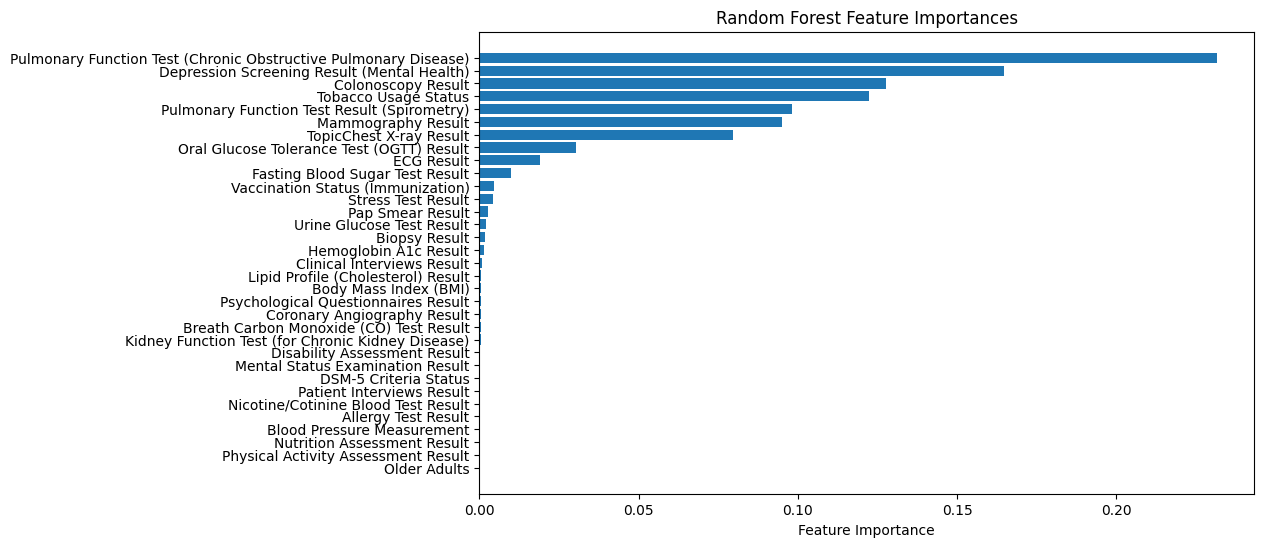

In [147]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Assuming you have your training data x_train and corresponding labels y_train
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)

# Get feature importances from the fitted Random Forest model
feature_importances = rf_model.feature_importances_
# Get the names of the features
feature_names = ['ECG Result', 'Stress Test Result',
       'Lipid Profile (Cholesterol) Result', 'Coronary Angiography Result',
       'Pulmonary Function Test Result (Spirometry)','Topic'
       'Chest X-ray Result', 'Allergy Test Result', 'Mammography Result',
       'Colonoscopy Result', 'Pap Smear Result', 'Biopsy Result',
       'Fasting Blood Sugar Test Result',
       'Oral Glucose Tolerance Test (OGTT) Result', 'Hemoglobin A1c Result',
       'Urine Glucose Test Result', 'Clinical Interviews Result',
       'Psychological Questionnaires Result',
       'Mental Status Examination Result', 'DSM-5 Criteria Status',
       'Patient Interviews Result', 'Nicotine/Cotinine Blood Test Result',
       'Breath Carbon Monoxide (CO) Test Result', 'Blood Pressure Measurement',
       'Kidney Function Test (for Chronic Kidney Disease)',
       'Pulmonary Function Test (Chronic Obstructive Pulmonary Disease)',
       'Depression Screening Result (Mental Health)', 'Tobacco Usage Status',
       'Body Mass Index (BMI)', 'Vaccination Status (Immunization)',
       'Nutrition Assessment Result', 'Physical Activity Assessment Result',
       'Disability Assessment Result', 'Older Adults']  # Replace with the actual feature names

# Sort the features by their importances
sorted_indices = feature_importances.argsort()

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importances)), feature_importances[sorted_indices], align='center')
plt.yticks(range(len(feature_importances)), [feature_names[i] for i in sorted_indices])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importances')
plt.show()
